In [1]:
import pandas as pd
import glob
import re
import os
import requests
import time
from tqdm import tqdm


df_s = pd.read_csv("article_data.csv", sep=",", header=0)
#parse out beginning page
df_s[['BP', 'EP']] = df_s['pages'].str.split('-', expand=True)
#df_s = pd.read_csv(soc10_d, sep=",", header4=0, usecols = ["journal","volume", "issue", "pages"])
df_s



,artid,journal,volume,issue,year,month,pages,cited3,cited2012,aut_num,...,bip_avgdegree,aut_flowhier,ack_flowhier,com_flowhier,aut_numcomp,ack_numcomp,com_numcomp,bip_numcomp,BP,EP
0,1,annurevisoci,35,1,2009,6,1-19,0,0,1,...,0.000000,99.0,99.0,99.000000,1,0,1,1,1,19
1,2,annurevisoci,35,1,2009,6,21-42,15,15,1,...,0.000000,99.0,99.0,99.000000,1,0,1,1,21,42
2,3,annurevisoci,35,1,2009,6,43-65,17,21,2,...,0.777778,1.0,0.2,0.277778,1,3,3,5,43,65
3,4,annurevisoci,35,1,2009,6,67-85,6,7,1,...,0.666667,99.0,99.0,0.000000,1,2,2,2,67,85
4,5,annurevisoci,35,1,2009,6,87-105,18,18,2,...,0.000000,0.0,99.0,0.000000,1,0,1,2,87,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3593,3746,amersocirevi,65,1,2000,2,122-127,3,21,3,...,4.250000,0.0,99.0,0.000000,1,1,1,1,122,127
3594,3747,amersocirevi,65,1,2000,2,138-167,8,54,1,...,0.333333,99.0,99.0,0.000000,1,5,5,5,138,167
3595,3748,amersocirevi,65,1,2000,2,128-137,1,7,4,...,0.000000,1.0,99.0,1.000000,3,1,4,5,128,137
3596,3749,amersocirevi,65,1,2000,2,96-116,16,186,3,...,4.250000,0.0,99.0,0.000000,1,1,1,1,96,116


In [2]:

wos_meta_d = "WoS_sociology_metadata_2000_2009/"
dfs = []
for r, d, f0 in os.walk(wos_meta_d):
    for fname in f0:
        if "txt" in fname:
            df0 = pd.read_csv( os.path.join(wos_meta_d,fname), sep='\t', header=0, dtype={"BP":str, "EP":str} )
            dfs.append(df0)
df = pd.concat(dfs)
df = df.reset_index(drop=True)
df


,PT,AU,BA,CA,GP,RI,OI,BE,Z2,AU.1,...,DG,C1,C3,EC,DE,DA,UT,PM,Unnamed: 78,Publication Type
0,J,"Hallinan, Maureen T.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-07-01,WOS:000258547900003,NaN,NaN,NaN
1,J,"Jasper, James M.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-07-01,WOS:000258833100019,NaN,NaN,NaN
2,J,"Jean, Peter K. B. St.; Weitzer, Ronald",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-07-01,WOS:000258833100017,NaN,NaN,NaN
3,J,"Kaminski, Elizabeth",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-07-01,WOS:000258833100020,NaN,NaN,NaN
4,J,"Kempner, Joanna",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-07-01,WOS:000258833100010,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dissertation and Thesis Subjects
6312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Author Keywords
6313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indexed Date
6314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UT (Unique ID)


In [3]:

for idx, c in enumerate(df.columns):
    print(idx+1, c)


1 PT
2 AU
3 BA
4 CA
5 GP
6 RI
7 OI
8 BE
9 Z2
10 AU.1
11 AA
12 TI
13 X1
14 Y1
15 Z1
16 FT
17 PN
18 AE
19 Z3
20 SO
21 S1
22 SE
23 BS
24 VL
25 IS
26 SI
27 MA
28 BP
29 EP
30 AR
31 VN
32 VH
33 DI
34 D2
35 L1
36 L2
37 L3
38 EA
39 SU
40 DT
41 PD
42 PY
43 AB
44 X4
45 Y4
46 Z4
47 AK
48 CT
49 CY
50 SP
51 CL
52 TC
53 Z8
54 ZR
55 ZA
56 ZB
57 ZS
58 Z9
59 U1
60 U2
61 SN
62 EI
63 BN
64 G1
65 NR
66 CR
67 LA
68 AS
69 AC
70 CG
71 DG
72 C1
73 C3
74 EC
75 DE
76 DA
77 UT
78 PM
79 Unnamed: 78
80 Publication Type


In [4]:

df1 = df[["DI", "D2", "AU","TI","SO","PY","VL","IS","BP","EP"]] # DOI, Authors, Title, Source, Publication Year, Volume, Issue, Begin Page, End Page
df1["pages"] = df1['BP'].astype(str) + '-' + df1['EP'].astype(str)
df1[df1["DI"].isna()]


<ipython-input-4-d31685ecafe3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["pages"] = df1['BP'].astype(str) + '-' + df1['EP'].astype(str)


,DI,D2,AU,TI,SO,PY,VL,IS,BP,EP,pages
2,NaN,NaN,"Jean, Peter K. B. St.; Weitzer, Ronald",Race and Policing in America: Conflict and reform,AMERICAN JOURNAL OF SOCIOLOGY,2008.0,114.0,1.0,254,256,254-256
31,NaN,NaN,"Ben-Yehuda, Nachman",The path of the devil: Early modern witch hunts,SOCIAL FORCES,2008.0,86.0,4.0,1844,1845,1844-1845
36,NaN,NaN,"Cadge, Wendy",Straight to Jesus: Sexual and Christian conver...,SOCIAL FORCES,2008.0,86.0,4.0,1841,1843,1841-1843
39,NaN,NaN,"Collins, Patricia Hill",Party/politics: Horizons in black political th...,SOCIAL FORCES,2008.0,86.0,4.0,1865,1867,1865-1867
40,NaN,NaN,"Crowley, Martha",From hire to liar: The role of deception in th...,SOCIAL FORCES,2008.0,86.0,4.0,1867,1869,1867-1869
...,...,...,...,...,...,...,...,...,...,...,...
6311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan-nan
6312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan-nan
6313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan-nan
6314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan-nan


In [5]:

df_join = df_s.merge(df1, left_on = ["year","volume", "issue", "BP"], right_on=["PY","VL","IS","BP"], how="left")
df_join



,artid,journal,volume,issue,year,month,pages_x,cited3,cited2012,aut_num,...,DI,D2,AU,TI,SO,PY,VL,IS,EP_y,pages_y
0,1,annurevisoci,35,1,2009,6,1-19,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,annurevisoci,35,1,2009,6,21-42,15,15,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,annurevisoci,35,1,2009,6,43-65,17,21,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,annurevisoci,35,1,2009,6,67-85,6,7,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,annurevisoci,35,1,2009,6,87-105,18,18,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,3746,amersocirevi,65,1,2000,2,122-127,3,21,3,...,10.2307/2657293,NaN,"Frank, DJ; Hironaka, A; Schofer, E",Environmentalism as a global institution -: <i...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,127,122-127
3604,3747,amersocirevi,65,1,2000,2,138-167,8,54,1,...,10.2307/2657295,NaN,"Gorski, PS",Historicizing the secularization debate: Churc...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,167,138-167
3605,3748,amersocirevi,65,1,2000,2,128-137,1,7,4,...,10.2307/2657294,NaN,"Horton, HD; Allen, BL; Herring, C; Thomas, ME",Lost in the storm: The sociology of the black ...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,137,128-137
3606,3749,amersocirevi,65,1,2000,2,96-116,16,186,3,...,10.2307/2657291,NaN,"Frank, DJ; Hironaka, A; Schofer, E",The nation-state and the natural environment o...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,116,96-116


In [6]:
df1.groupby("SO").count()

,DI,D2,AU,TI,PY,VL,IS,BP,EP,pages
SO,,,,,,,,,,
AMERICAN JOURNAL OF SOCIOLOGY,1893,0,1989,1989,1989,1989,1978,1989,1989,1989
AMERICAN SOCIOLOGICAL REVIEW,465,0,481,481,481,481,481,481,481,481
ANNUAL REVIEW OF SOCIOLOGY,233,0,234,239,239,239,0,239,239,239
JOURNAL OF MARRIAGE AND FAMILY,922,0,1100,1100,1100,1100,1100,1092,1092,1100
JOURNAL OF SUSTAINABLE AGRICULTURE,1,0,1,1,1,1,1,1,1,1
SOCIAL FORCES,945,0,1189,1189,1189,1189,1189,1187,1187,1189
SOCIAL NETWORKS,252,0,252,252,252,252,252,252,252,252
SOCIAL SCIENCE RESEARCH,439,0,443,443,443,443,443,443,443,443
"SOCIOLOGICAL METHODOLOGY 2000, VOL 30",7,0,8,8,8,8,0,8,8,8


In [7]:
na = df_join[df_join["DI"].isna()]

In [8]:
na = na.reset_index()
na

,index,artid,journal,volume,issue,year,month,pages_x,cited3,cited2012,...,DI,D2,AU,TI,SO,PY,VL,IS,EP_y,pages_y
0,0,1,annurevisoci,35,1,2009,6,1-19,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,annurevisoci,35,1,2009,6,21-42,15,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,annurevisoci,35,1,2009,6,43-65,17,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,annurevisoci,35,1,2009,6,67-85,6,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,annurevisoci,35,1,2009,6,87-105,18,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,3578,3721,socimeth,30,0,2000,6,1-28,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
580,3579,3722,socimeth,30,0,2000,6,237-260,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581,3580,3723,socimeth,30,0,2000,6,261-315,0,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
582,3581,3724,socimeth,30,0,2000,6,165-202,2,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
na_new = na.merge(df1, left_on = ["year","volume", "BP"], right_on=["PY","VL","BP"], how="left")
na_new = na_new.reset_index(drop=True)
na_new

,index,artid,journal,volume,issue,year,month,pages_x,cited3,cited2012,...,DI_y,D2_y,AU_y,TI_y,SO_y,PY_y,VL_y,IS_y,EP,pages
0,0,1,annurevisoci,35,1,2009,6,1-19,0,0,...,NaN,NaN,NaN,ANNUAL REVIEW OF SOCIOLOGY,ANNUAL REVIEW OF SOCIOLOGY,2009.0,35.0,NaN,608,1-608
1,0,1,annurevisoci,35,1,2009,6,1-19,0,0,...,10.1146/annurev-soc-070308-115936,NaN,"Gans, Herbert J.",Working in Six Research Areas: A Multi-Field S...,ANNUAL REVIEW OF SOCIOLOGY,2009.0,35.0,NaN,19,1-19
2,1,2,annurevisoci,35,1,2009,6,21-42,15,15,...,10.1146/annurev-soc-070308-115916,NaN,"Brubaker, Rogers","Ethnicity, Race, and Nationalism",ANNUAL REVIEW OF SOCIOLOGY,2009.0,35.0,NaN,42,21-42
3,2,3,annurevisoci,35,1,2009,6,43-65,17,21,...,10.1146/annurev-soc-070308-115954,NaN,"Jacobs, Jerry A.; Frickel, Scott",Interdisciplinarity: A Critical Assessment,ANNUAL REVIEW OF SOCIOLOGY,2009.0,35.0,NaN,65,43-65
4,3,4,annurevisoci,35,1,2009,6,67-85,6,7,...,10.1146/annurev.soc.34.040507.134631,NaN,"Andersen, Robert",Nonparametric Methods for Modeling Nonlinearit...,ANNUAL REVIEW OF SOCIOLOGY,2009.0,35.0,NaN,85,67-85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3578,3721,socimeth,30,0,2000,6,1-28,2,4,...,NaN,NaN,"Arminger, G; Clogg, CC; Cheng, TW",Regression analysis of multivariate binary res...,"SOCIOLOGICAL METHODOLOGY 2000, VOL 30",2000.0,30.0,NaN,26,1-26
607,3579,3722,socimeth,30,0,2000,6,237-260,0,1,...,10.1111/0081-1750.00080,NaN,"Hoem, JM",Systematic patterns of zero exposures in event...,"SOCIOLOGICAL METHODOLOGY 2000, VOL 30",2000.0,30.0,NaN,259,237-259
608,3580,3723,socimeth,30,0,2000,6,261-315,0,12,...,10.1111/0081-1750.00081,NaN,"Montgomery, JD","The self as a fuzzy set of roles, role theory ...","SOCIOLOGICAL METHODOLOGY 2000, VOL 30",2000.0,30.0,NaN,314,261-314
609,3581,3724,socimeth,30,0,2000,6,165-202,2,73,...,10.1111/0081-1750.00078,NaN,"Yuan, KH; Bentler, PM",Three likelihood-based methods for mean and co...,"SOCIOLOGICAL METHODOLOGY 2000, VOL 30",2000.0,30.0,NaN,200,165-200


In [10]:
na_new[na_new["DI_y"].isna()]

,index,artid,journal,volume,issue,year,month,pages_x,cited3,cited2012,...,DI_y,D2_y,AU_y,TI_y,SO_y,PY_y,VL_y,IS_y,EP,pages
0,0,1,annurevisoci,35,1,2009,6,1-19,0,0,...,NaN,NaN,NaN,ANNUAL REVIEW OF SOCIOLOGY,ANNUAL REVIEW OF SOCIOLOGY,2009.0,35.0,NaN,608,1-608
28,27,28,annurevisoci,34,1,2008,6,1-13,3,3,...,NaN,NaN,NaN,ANNUAL REVIEW OF SOCIOLOGY,ANNUAL REVIEW OF SOCIOLOGY,2008.0,34.0,NaN,540,1-540
51,49,50,annurevisoci,33,1,2007,6,1-19,3,7,...,NaN,NaN,NaN,ANNUAL REVIEW OF SOCIOLOGY,ANNUAL REVIEW OF SOCIOLOGY,2007.0,33.0,NaN,593,1-593
77,74,75,annurevisoci,32,1,2006,6,1-23,0,0,...,NaN,NaN,NaN,ANNUAL REVIEW OF SOCIOLOGY,ANNUAL REVIEW OF SOCIOLOGY,2006.0,32.0,NaN,500,1-500
97,93,94,annurevisoci,31,1,2005,6,1-24,3,10,...,NaN,NaN,NaN,ANNUAL REVIEW OF SOCIOLOGY,ANNUAL REVIEW OF SOCIOLOGY,2005.0,31.0,NaN,438,1-438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,3447,3590,socsciresearch,31,3,2002,9,334-363,4,20,...,NaN,NaN,"Robison, KK; Crenshaw, EM",Post-industrial transformations and cyber-spac...,SOCIAL SCIENCE RESEARCH,2002.0,31.0,3.0,363,334-363
585,3545,3688,socialforces,79,1,2000,9,1-28,2,8,...,NaN,NaN,"Tittle, CR; Rotolo, T",IQ and stratification: An empirical evaluation...,SOCIAL FORCES,2000.0,79.0,1.0,28,1-28
586,3554,3697,socialforces,78,4,2000,6,1227-1276,2,16,...,NaN,NaN,"Rytina, S",Is occupational mobility declining in the US?,SOCIAL FORCES,2000.0,78.0,4.0,1276,1227-1276
591,3563,3706,socimeth,35,0,2005,8,1-97,17,59,...,NaN,NaN,NaN,"Sociological Methodology 2005, Vol 35","SOCIOLOGICAL METHODOLOGY 2005, VOL 35",2005.0,35.0,NaN,348,1-348


In [11]:
#na_new["DI_y"]
na_new[na_new["DI_x"].isna()]
na_new.columns

Index(['index', 'artid', 'journal', 'volume', 'issue', 'year', 'month',
       'pages_x', 'cited3', 'cited2012', 'aut_num', 'ack_num', 'com_num',
       'aut_cluster', 'ack_cluster', 'com_cluster', 'bip_cluster',
       'aut_jaccard', 'ack_jaccard', 'com_jaccard', 'aut_density',
       'ack_density', 'com_density', 'bip_density', 'aut_avgdegree',
       'ack_avgdegree', 'com_avgdegree', 'bip_avgdegree', 'aut_flowhier',
       'ack_flowhier', 'com_flowhier', 'aut_numcomp', 'ack_numcomp',
       'com_numcomp', 'bip_numcomp', 'BP', 'EP_x', 'DI_x', 'D2_x', 'AU_x',
       'TI_x', 'SO_x', 'PY_x', 'VL_x', 'IS_x', 'EP_y', 'pages_y', 'DI_y',
       'D2_y', 'AU_y', 'TI_y', 'SO_y', 'PY_y', 'VL_y', 'IS_y', 'EP', 'pages'],
      dtype='object')

In [12]:
na_new.columns


Index(['index', 'artid', 'journal', 'volume', 'issue', 'year', 'month',
       'pages_x', 'cited3', 'cited2012', 'aut_num', 'ack_num', 'com_num',
       'aut_cluster', 'ack_cluster', 'com_cluster', 'bip_cluster',
       'aut_jaccard', 'ack_jaccard', 'com_jaccard', 'aut_density',
       'ack_density', 'com_density', 'bip_density', 'aut_avgdegree',
       'ack_avgdegree', 'com_avgdegree', 'bip_avgdegree', 'aut_flowhier',
       'ack_flowhier', 'com_flowhier', 'aut_numcomp', 'ack_numcomp',
       'com_numcomp', 'bip_numcomp', 'BP', 'EP_x', 'DI_x', 'D2_x', 'AU_x',
       'TI_x', 'SO_x', 'PY_x', 'VL_x', 'IS_x', 'EP_y', 'pages_y', 'DI_y',
       'D2_y', 'AU_y', 'TI_y', 'SO_y', 'PY_y', 'VL_y', 'IS_y', 'EP', 'pages'],
      dtype='object')

In [13]:
na_join1 = na_new[['artid','DI_y', 'journal', 'volume', 'issue', 'year', 'month',
                   'cited3', 'cited2012', 'aut_num', 'ack_num', 'com_num',
       'aut_cluster', 'ack_cluster', 'com_cluster', 'bip_cluster',
       'aut_jaccard', 'ack_jaccard', 'com_jaccard', 'aut_density',
       'ack_density', 'com_density', 'bip_density', 'aut_avgdegree',
       'ack_avgdegree', 'com_avgdegree', 'bip_avgdegree', 'aut_flowhier',
       'ack_flowhier', 'com_flowhier', 'aut_numcomp', 'ack_numcomp',
       'com_numcomp', 'bip_numcomp', 'BP', 'EP_x', 'pages']]
na_join1 = na_join1.rename(columns = {'EP_x':'EP', 'DI_y':'DI'})
na_join1

,artid,DI,journal,volume,issue,year,month,cited3,cited2012,aut_num,...,aut_flowhier,ack_flowhier,com_flowhier,aut_numcomp,ack_numcomp,com_numcomp,bip_numcomp,BP,EP,pages
0,1,NaN,annurevisoci,35,1,2009,6,0,0,1,...,99.0,99.0,99.000000,1,0,1,1,1,19,1-608
1,1,10.1146/annurev-soc-070308-115936,annurevisoci,35,1,2009,6,0,0,1,...,99.0,99.0,99.000000,1,0,1,1,1,19,1-19
2,2,10.1146/annurev-soc-070308-115916,annurevisoci,35,1,2009,6,15,15,1,...,99.0,99.0,99.000000,1,0,1,1,21,42,21-42
3,3,10.1146/annurev-soc-070308-115954,annurevisoci,35,1,2009,6,17,21,2,...,1.0,0.2,0.277778,1,3,3,5,43,65,43-65
4,4,10.1146/annurev.soc.34.040507.134631,annurevisoci,35,1,2009,6,6,7,1,...,99.0,99.0,0.000000,1,2,2,2,67,85,67-85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3721,NaN,socimeth,30,0,2000,6,2,4,3,...,99.0,99.0,99.000000,3,0,3,3,1,28,1-26
607,3722,10.1111/0081-1750.00080,socimeth,30,0,2000,6,0,1,1,...,99.0,99.0,99.000000,1,0,1,1,237,260,237-259
608,3723,10.1111/0081-1750.00081,socimeth,30,0,2000,6,0,12,1,...,99.0,99.0,99.000000,1,2,3,3,261,315,261-314
609,3724,10.1111/0081-1750.00078,socimeth,30,0,2000,6,2,73,2,...,0.0,99.0,0.000000,1,0,1,2,165,202,165-200


In [14]:
ya = df_join[(df_join["DI"].isna()==False) & (df_join["pages_x"].isna()==False)]
ya1 = ya[['artid', 'DI', 'journal', 'volume', 'issue', 'year', 'month', 'pages_x',
       'cited3', 'cited2012', 'aut_num', 'ack_num', 'com_num', 'aut_cluster',
       'ack_cluster', 'com_cluster', 'bip_cluster', 'aut_jaccard',
       'ack_jaccard', 'com_jaccard', 'aut_density', 'ack_density',
       'com_density', 'bip_density', 'aut_avgdegree', 'ack_avgdegree',
       'com_avgdegree', 'bip_avgdegree', 'aut_flowhier', 'ack_flowhier',
       'com_flowhier', 'aut_numcomp', 'ack_numcomp', 'com_numcomp',
       'bip_numcomp', 'BP', 'EP_x']]
ya1 = ya1.rename(columns={'pages_x':'pages', 'EP_x':'EP'})
ya1

,artid,DI,journal,volume,issue,year,month,pages,cited3,cited2012,...,bip_avgdegree,aut_flowhier,ack_flowhier,com_flowhier,aut_numcomp,ack_numcomp,com_numcomp,bip_numcomp,BP,EP
233,234,10.1177/000312240907400505,amersocirevi,74,5,2009,10,777-799,28,29,...,0.000000,1.0,99.000000,1.000000,1,1,2,4,777,799
234,235,10.1177/000312240907400504,amersocirevi,74,5,2009,10,756-776,12,12,...,0.000000,99.0,1.000000,1.000000,1,3,4,6,756,776
235,236,10.1177/000312240907400506,amersocirevi,74,5,2009,10,800-820,15,15,...,1.875000,0.0,0.333333,0.086957,1,4,2,3,800,820
236,237,10.1177/000312240907400502,amersocirevi,74,5,2009,10,709-730,16,16,...,0.000000,99.0,99.000000,99.000000,1,0,1,1,709,730
237,238,10.1177/000312240907400501,amersocirevi,74,5,2009,10,683-708,7,8,...,0.833333,99.0,0.250000,0.111111,1,3,3,4,683,708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,3746,10.2307/2657293,amersocirevi,65,1,2000,2,122-127,3,21,...,4.250000,0.0,99.000000,0.000000,1,1,1,1,122,127
3604,3747,10.2307/2657295,amersocirevi,65,1,2000,2,138-167,8,54,...,0.333333,99.0,99.000000,0.000000,1,5,5,5,138,167
3605,3748,10.2307/2657294,amersocirevi,65,1,2000,2,128-137,1,7,...,0.000000,1.0,99.000000,1.000000,3,1,4,5,128,137
3606,3749,10.2307/2657291,amersocirevi,65,1,2000,2,96-116,16,186,...,4.250000,0.0,99.000000,0.000000,1,1,1,1,96,116


In [15]:
df3 = pd.concat([ya1,na_join1])
df3 = df3.reset_index(drop=True)
df3

,artid,DI,journal,volume,issue,year,month,pages,cited3,cited2012,...,bip_avgdegree,aut_flowhier,ack_flowhier,com_flowhier,aut_numcomp,ack_numcomp,com_numcomp,bip_numcomp,BP,EP
0,234,10.1177/000312240907400505,amersocirevi,74,5,2009,10,777-799,28,29,...,0.000000,1.0,99.000000,1.000000,1,1,2,4,777,799
1,235,10.1177/000312240907400504,amersocirevi,74,5,2009,10,756-776,12,12,...,0.000000,99.0,1.000000,1.000000,1,3,4,6,756,776
2,236,10.1177/000312240907400506,amersocirevi,74,5,2009,10,800-820,15,15,...,1.875000,0.0,0.333333,0.086957,1,4,2,3,800,820
3,237,10.1177/000312240907400502,amersocirevi,74,5,2009,10,709-730,16,16,...,0.000000,99.0,99.000000,99.000000,1,0,1,1,709,730
4,238,10.1177/000312240907400501,amersocirevi,74,5,2009,10,683-708,7,8,...,0.833333,99.0,0.250000,0.111111,1,3,3,4,683,708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3630,3721,NaN,socimeth,30,0,2000,6,1-26,2,4,...,0.000000,99.0,99.000000,99.000000,3,0,3,3,1,28
3631,3722,10.1111/0081-1750.00080,socimeth,30,0,2000,6,237-259,0,1,...,0.000000,99.0,99.000000,99.000000,1,0,1,1,237,260
3632,3723,10.1111/0081-1750.00081,socimeth,30,0,2000,6,261-314,0,12,...,0.000000,99.0,99.000000,99.000000,1,2,3,3,261,315
3633,3724,10.1111/0081-1750.00078,socimeth,30,0,2000,6,165-200,2,73,...,0.000000,0.0,99.000000,0.000000,1,0,1,2,165,202


In [16]:
gb1 = df3.groupby('artid').count()
gb2 = gb1[gb1["journal"]>1].reset_index(drop=False)
gb2

#duplicates
temp = df3.merge(gb2[["artid","DI"]], on="artid", how = "left").reset_index(drop=True)
temp1 = temp[temp["DI_y"].isna()==False]
temp1 = temp1.sort_values(by='artid', ascending=False)
temp2 = temp1[temp1["DI_x"].isna()==False]
temp3 = temp2.drop_duplicates(keep='first').reset_index(drop=True)
temp3

db2 = gb1[gb1["journal"]==1].reset_index(drop=False)
demp = df3.merge(db2[["artid","DI"]], on="artid", how = "left").reset_index(drop=True)

demp1 = demp[demp["DI_y"].isna()==False]
demp1 = demp1.sort_values(by='artid', ascending=False)
demp2 = demp1[demp1["DI_x"].isna()==False]
demp3 = demp2.drop_duplicates(keep='first').reset_index(drop=True)

df4 = pd.concat([demp3, temp3]).sort_values(by='artid', ascending=True).drop("DI_y", axis=1).reset_index(drop=True)
df4 = df4.rename(columns={"DI_x":"DI"})
print(len(df3), len(temp3), len(db2), len(demp3), len(temp3)+len(demp3))
df4

3635 11 3578 3344 3355


,artid,DI,journal,volume,issue,year,month,pages,cited3,cited2012,...,bip_avgdegree,aut_flowhier,ack_flowhier,com_flowhier,aut_numcomp,ack_numcomp,com_numcomp,bip_numcomp,BP,EP
0,1,10.1146/annurev-soc-070308-115936,annurevisoci,35,1,2009,6,1-19,0,0,...,0.000000,99.0,99.0,99.000000,1,0,1,1,1,19
1,2,10.1146/annurev-soc-070308-115916,annurevisoci,35,1,2009,6,21-42,15,15,...,0.000000,99.0,99.0,99.000000,1,0,1,1,21,42
2,3,10.1146/annurev-soc-070308-115954,annurevisoci,35,1,2009,6,43-65,17,21,...,0.777778,1.0,0.2,0.277778,1,3,3,5,43,65
3,4,10.1146/annurev.soc.34.040507.134631,annurevisoci,35,1,2009,6,67-85,6,7,...,0.666667,99.0,99.0,0.000000,1,2,2,2,67,85
4,5,10.1146/annurev-soc-070308-115920,annurevisoci,35,1,2009,6,87-105,18,18,...,0.000000,0.0,99.0,0.000000,1,0,1,2,87,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3350,3746,10.2307/2657293,amersocirevi,65,1,2000,2,122-127,3,21,...,4.250000,0.0,99.0,0.000000,1,1,1,1,122,127
3351,3747,10.2307/2657295,amersocirevi,65,1,2000,2,138-167,8,54,...,0.333333,99.0,99.0,0.000000,1,5,5,5,138,167
3352,3748,10.2307/2657294,amersocirevi,65,1,2000,2,128-137,1,7,...,0.000000,1.0,99.0,1.000000,3,1,4,5,128,137
3353,3749,10.2307/2657291,amersocirevi,65,1,2000,2,96-116,16,186,...,4.250000,0.0,99.0,0.000000,1,1,1,1,96,116


In [17]:
df_join["pages_diff"] = df_join['pages_y'] != df_join['pages_x']


df_join.loc[(df_join['pages_diff']) & (df_join['pages_y'].isna()), 'pages_y'] = df_join['pages_x']

df_join['pages_diff'] = df_join['pages_y'] != df_join['pages_x']

df_join



,artid,journal,volume,issue,year,month,pages_x,cited3,cited2012,aut_num,...,D2,AU,TI,SO,PY,VL,IS,EP_y,pages_y,pages_diff
0,1,annurevisoci,35,1,2009,6,1-19,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-19,False
1,2,annurevisoci,35,1,2009,6,21-42,15,15,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21-42,False
2,3,annurevisoci,35,1,2009,6,43-65,17,21,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43-65,False
3,4,annurevisoci,35,1,2009,6,67-85,6,7,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67-85,False
4,5,annurevisoci,35,1,2009,6,87-105,18,18,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87-105,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,3746,amersocirevi,65,1,2000,2,122-127,3,21,3,...,NaN,"Frank, DJ; Hironaka, A; Schofer, E",Environmentalism as a global institution -: <i...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,127,122-127,False
3604,3747,amersocirevi,65,1,2000,2,138-167,8,54,1,...,NaN,"Gorski, PS",Historicizing the secularization debate: Churc...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,167,138-167,False
3605,3748,amersocirevi,65,1,2000,2,128-137,1,7,4,...,NaN,"Horton, HD; Allen, BL; Herring, C; Thomas, ME",Lost in the storm: The sociology of the black ...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,137,128-137,False
3606,3749,amersocirevi,65,1,2000,2,96-116,16,186,3,...,NaN,"Frank, DJ; Hironaka, A; Schofer, E",The nation-state and the natural environment o...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,116,96-116,False


In [18]:
df_join[df_join["DI"].isna()]


,artid,journal,volume,issue,year,month,pages_x,cited3,cited2012,aut_num,...,D2,AU,TI,SO,PY,VL,IS,EP_y,pages_y,pages_diff
0,1,annurevisoci,35,1,2009,6,1-19,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-19,False
1,2,annurevisoci,35,1,2009,6,21-42,15,15,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21-42,False
2,3,annurevisoci,35,1,2009,6,43-65,17,21,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43-65,False
3,4,annurevisoci,35,1,2009,6,67-85,6,7,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67-85,False
4,5,annurevisoci,35,1,2009,6,87-105,18,18,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87-105,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,3721,socimeth,30,0,2000,6,1-28,2,4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-28,False
3579,3722,socimeth,30,0,2000,6,237-260,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237-260,False
3580,3723,socimeth,30,0,2000,6,261-315,0,12,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261-315,False
3581,3724,socimeth,30,0,2000,6,165-202,2,73,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165-202,False


In [19]:
df_join_updated = df_join.merge(
    na_new[['year', 'volume', 'BP', 'DI_y']],  
    on=['year', 'volume', 'BP'],            
    how='left',                              
    suffixes=('', '_new')                   
)

df_join_updated['DI'] = df_join_updated['DI'].fillna(df_join_updated['DI_y'])

df_join_updated = df_join_updated.drop(columns=['DI_y'])

num_missing_doi_after_update = df_join_updated['DI'].isna().sum()
print(f"Total articles still missing DOI after update: {num_missing_doi_after_update}")

df_join_updated

Total articles still missing DOI after update: 311


,artid,journal,volume,issue,year,month,pages_x,cited3,cited2012,aut_num,...,D2,AU,TI,SO,PY,VL,IS,EP_y,pages_y,pages_diff
0,1,annurevisoci,35,1,2009,6,1-19,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-19,False
1,1,annurevisoci,35,1,2009,6,1-19,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-19,False
2,2,annurevisoci,35,1,2009,6,21-42,15,15,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21-42,False
3,3,annurevisoci,35,1,2009,6,43-65,17,21,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43-65,False
4,4,annurevisoci,35,1,2009,6,67-85,6,7,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67-85,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,3746,amersocirevi,65,1,2000,2,122-127,3,21,3,...,NaN,"Frank, DJ; Hironaka, A; Schofer, E",Environmentalism as a global institution -: <i...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,127,122-127,False
3664,3747,amersocirevi,65,1,2000,2,138-167,8,54,1,...,NaN,"Gorski, PS",Historicizing the secularization debate: Churc...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,167,138-167,False
3665,3748,amersocirevi,65,1,2000,2,128-137,1,7,4,...,NaN,"Horton, HD; Allen, BL; Herring, C; Thomas, ME",Lost in the storm: The sociology of the black ...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,137,128-137,False
3666,3749,amersocirevi,65,1,2000,2,96-116,16,186,3,...,NaN,"Frank, DJ; Hironaka, A; Schofer, E",The nation-state and the natural environment o...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,116,96-116,False


In [20]:
df_join_updated = df_join_updated.drop_duplicates(subset=["year", "volume", "journal", "pages_x", "DI"], keep="first")

df_join_updated

,artid,journal,volume,issue,year,month,pages_x,cited3,cited2012,aut_num,...,D2,AU,TI,SO,PY,VL,IS,EP_y,pages_y,pages_diff
0,1,annurevisoci,35,1,2009,6,1-19,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-19,False
1,1,annurevisoci,35,1,2009,6,1-19,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-19,False
2,2,annurevisoci,35,1,2009,6,21-42,15,15,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21-42,False
3,3,annurevisoci,35,1,2009,6,43-65,17,21,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43-65,False
4,4,annurevisoci,35,1,2009,6,67-85,6,7,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67-85,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,3746,amersocirevi,65,1,2000,2,122-127,3,21,3,...,NaN,"Frank, DJ; Hironaka, A; Schofer, E",Environmentalism as a global institution -: <i...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,127,122-127,False
3664,3747,amersocirevi,65,1,2000,2,138-167,8,54,1,...,NaN,"Gorski, PS",Historicizing the secularization debate: Churc...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,167,138-167,False
3665,3748,amersocirevi,65,1,2000,2,128-137,1,7,4,...,NaN,"Horton, HD; Allen, BL; Herring, C; Thomas, ME",Lost in the storm: The sociology of the black ...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,137,128-137,False
3666,3749,amersocirevi,65,1,2000,2,96-116,16,186,3,...,NaN,"Frank, DJ; Hironaka, A; Schofer, E",The nation-state and the natural environment o...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,116,96-116,False


In [21]:
df_join_updated[df_join_updated["DI"].isna()]

,artid,journal,volume,issue,year,month,pages_x,cited3,cited2012,aut_num,...,D2,AU,TI,SO,PY,VL,IS,EP_y,pages_y,pages_diff
0,1,annurevisoci,35,1,2009,6,1-19,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-19,False
28,28,annurevisoci,34,1,2008,6,1-13,3,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-13,False
51,50,annurevisoci,33,1,2007,6,1-19,3,7,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-19,False
77,75,annurevisoci,32,1,2006,6,1-23,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-23,False
97,94,annurevisoci,31,1,2005,6,1-24,3,10,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-24,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3506,3590,socsciresearch,31,3,2002,9,334-363,4,20,2,...,NaN,"Robison, KK; Crenshaw, EM",Post-industrial transformations and cyber-spac...,SOCIAL SCIENCE RESEARCH,2002.0,31.0,3.0,363,334-363,False
3604,3688,socialforces,79,1,2000,9,1-28,2,8,2,...,NaN,"Tittle, CR; Rotolo, T",IQ and stratification: An empirical evaluation...,SOCIAL FORCES,2000.0,79.0,1.0,28,1-28,False
3613,3697,socialforces,78,4,2000,6,1227-1276,2,16,1,...,NaN,"Rytina, S",Is occupational mobility declining in the US?,SOCIAL FORCES,2000.0,78.0,4.0,1276,1227-1276,False
3623,3706,socimeth,35,0,2005,8,1-97,17,59,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-97,False


In [22]:

# Manually mapped DOIs for missing articles
manual_doi_mapping = {
    ("annurevisoci", 34, 2008, '1'): "10.1146/annurev.soc.34.040507.134654",
    ("annurevisoci", 33, 2007, '1'): "10.1146/annurev.soc.33.040406.131720",
    ('annurevisoci', 32, 2006, '1'): "10.1146/annurev.soc.32.061604.123051",
    ('annurevisoci', 31, 2005, '1'): "10.1146/annurev.soc.31.041304.122209",
    ('amersocirevi', 67, 2002, '389'): "10.2307/3088963",
    ('amersocirevi', 69, 2004, '1'): "10.1177/000312240406900102",
    ('amersocirevi', 70, 2005, '136'): "10.2307/4145353",
    ('socnetworks', 28, 2006, '97'): "10.1016/j.socnet.2005.04.005",
    ('socialforces', 86, 2008, '1753'): "10.1353/sof.0.0038",
    ('socialforces', 86, 2008, '1781'): "10.1353/sof.0.0043",
    ('socialforces', 86, 2008, '1217'): "10.1353/sof.0.0008",
    ('socialforces', 86, 2008, '1189'): "10.1353/sof.0.0004",
    ('socialforces', 86, 2007, '417'): "10.1353/sof.2008.0022",
    ('socialforces', 86, 2008, '1481'): "10.1353/sof.0.0057",
    ('socialforces', 86, 2008, '1561'): "10.1353/sof.0.0040",
    ('socialforces', 86, 2008, '1529'): "10.1353/sof.0.0035",
    ('socialforces', 86, 2008, '1455'): "10.1353/sof.0.0052",
    ('socialforces', 86, 2008, '1367'): "10.1353/sof.0.0037",
    ('socialforces', 86, 2008, '1675'): "10.1353/sof.0.0059",
    ('socialforces', 86, 2008, '1805'): "10.1353/sof.0.0048",
    ('socialforces', 86, 2008, '1848'): "10.1353/sof.0.0056",
    ('socialforces', 86, 2008, '1273'): "10.1353/sof.0.0018",
    ('socialforces', 86, 2008, '995'): "10.1353/sof.0.0002",
    ('socialforces', 86, 2008, '911'): "10.1353/sof.0.0015",
    ('socialforces', 86, 2008, '1027'): "10.1353/sof.0.0027",
    ('socialforces', 86, 2008, '1344'): "10.1353/sof.0.0011",

    ('socialforces', 86, 2008, '937'): "10.1353/sof.0.0010",
    ('socialforces', 86, 2008, '1079'): "10.1353/sof.0.0017",
    ('socialforces', 84, 2005, '595'): "10.1353/sof.2005.0095",
    ('socialforces', 84, 2006, '1455'): "10.1353/sof.2006.0072",
    ('socialforces', 85, 2006, '145'): "10.1353/sof.2006.0126",
    ('socialforces', 83, 2005, '1065'): "10.1353/sof.2005.0040",
    ('social forces', 83, 2005, 1443): "",
    ('socialforces', 83, 2005, '1697'): "10.1353/sof.2005.0060",
    ('jmarriagefamily', 70, 2008, '466'): "10.1111/j.1741-3737.2008.00494.x",
    ('jmarriagefamily', 69, 2007, '1107'): "10.1111/j.1741-3737.2007.00435.x",
    ('jmarriagefamily', 68, 2006, '56'): "10.1111/j.1741-3737.2006.00233.x",
    ('jmarriagefamily', 67, 2005, '352'): "10.1111/j.0022-2445.2005.00121.x",
    ('jmarriagefamily', 67, 2005, '1'): "10.1111/j.0022-2445.2005.00001.x",
    ('jmarriagefamily', 67, 2005, '627'): "10.1111/j.1741-3737.2005.00158.x",
    ('jmarriagefamily', 67, 2005, '85'): "10.1111/j.0022-2445.2005.00007.x",
    ('jmarriagefamily', 66, 2004, '1042'): "10.1111/j.0022-2445.2004.00077.x",
    ('jmarriagefamily', 66, 2004, '821'): "10.1111/j.0022-2445.2004.00055.x",
    ('jmarriagefamily', 66, 2004, '1332'): "10.1111/j.0022-2445.2004.00096.x",
    ('jmarriagefamily', 66, 2004, '1300'): "10.1111/j.0022-2445.2004.00094.x",
    ('jmarriagefamily', 66, 2004, '1231'): "10.1111/j.0022-2445.2004.00089.x",
    ('jmarriagefamily', 66, 2004, '210'): "10.1111/j.0022-2445.2004.00014.x-i1",
    ('jmarriagefamily', 66, 2004, '318'): "10.1111/j.1741-3737.2004.00023.x",
    ('jmarriagefamily', 66, 2004, '515'): "10.1111/j.1741-3737.2004.00035.x",
    ('jmarriagefamily', 66, 2004, '163'): "10.1111/j.0022-2445.2004.00011.x-i1",
    ('jmarriagefamily', 66, 2004, '101'): "10.1111/1467-6478.00050-i1",
    ('jmarriagefamily', 66, 2004, '236'): "10.1111/j.0022-2445.2004.00015.x",
    ('jmarriagefamily', 65, 2003, '1088'): "10.1111/j.1741-3737.2003.01081.x",
    ('jmarriagefamily', 65, 2003, '1082'): "10.1111/j.1741-3737.2003.01081.x",
    ('jmarriagefamily', 65, 2003, '1081'): "10.1111/j.1741-3737.2003.01081.x",
    ('jmarriagefamily', 65, 2003, '1085'): "10.1111/j.1741-3737.2003.01081.x",
    ('jmarriagefamily', 65, 2003, '1087'): "10.1111/j.1741-3737.2003.01081.x",
    ('jmarriagefamily', 65, 2003, '1084'): "10.1111/j.1741-3737.2003.01081.x",
    ('jmarriagefamily', 65, 2003, '1083'): "10.1111/j.1741-3737.2003.01081.x",
    ('jmarriagefamily', 65, 2003, '767'): "10.1111/j.1741-3737.2003.00762.x",
    ('jmarriagefamily', 65, 2003, '764'): "10.1111/j.1741-3737.2003.00762.x",
    ('jmarriagefamily', 65, 2003, '766'): "10.1111/j.1741-3737.2003.00762.x",
    ('jmarriagefamily', 65, 2003, '763'): "10.1111/j.1741-3737.2003.00762.x",
    ('jmarriagefamily', 65, 2003, '765'): "10.1111/j.1741-3737.2003.00762.x",
    ('jmarriagefamily', 65, 2003, '768'): "10.1111/j.1741-3737.2003.00762.x",
    ('jmarriagefamily', 65, 2003, '762'): "10.1111/j.1741-3737.2003.00762.x",
    ('jmarriagefamily', 65, 2003, '501'): "10.1111/j.1741-3737.2003.00496.x",
    ('jmarriagefamily', 65, 2003, '500'): "10.1111/j.1741-3737.2003.00496.x",
    ('jmarriagefamily', 65, 2003, '502'): "10.1111/j.1741-3737.2003.00496.x",
    ('jmarriagefamily', 65, 2003, '504'): "10.1111/j.1741-3737.2003.00496.x",
    ('jmarriagefamily', 65, 2003, '1089'): "10.1111/j.1741-3737.2003.01081.x",
    ('jmarriagefamily', 65, 2003, '769'): "10.1111/j.1741-3737.2003.00762.x",
    ('jmarriagefamily', 65, 2003, '496'): "10.1111/j.1741-3737.2003.00496.x",
    ('jmarriagefamily', 65, 2003, '499'): "10.1111/j.1741-3737.2003.00496.x",
    ('jmarriagefamily', 65, 2003, '503'): "10.1111/j.1741-3737.2003.00496.x",
    ('jmarriagefamily', 65, 2003, '498'): "10.1111/j.1741-3737.2003.00496.x",
    ('jmarriagefamily', 64, 2002, '270'): "10.1111/j.1741-3737.2002.00269.x",
    ('jmarriagefamily', 63, 2001, '804'): "10.1111/j.1741-3737.2001.00804.x",
    ('jmarriagefamily', 63, 2001, '582'): "10.1111/j.1741-3737.2001.00580.x",
    ('jmarriagefamily', 63, 2001, '589'): "10.1111/j.1741-3737.2001.00580.x",
    ('jmarriagefamily', 63, 2001, '592'): "10.1111/j.1741-3737.2001.00580.x",
    ('jmarriagefamily', 63, 2001, '585'): "10.1111/j.1741-3737.2001.00580.x",
    ('jmarriagefamily', 63, 2001, '279'): "10.1111/j.1741-3737.2001.00276.x",
    ('jmarriagefamily', 63, 2001, '1206'): "10.1111/j.1741-3737.2001.01199.x",
    ('jmarriagefamily', 63, 2001, '903'): "10.1111/j.1741-3737.2001.00902.x",
    ('socitheo', 22, 2004, '1'): "10.1111/j.1467-9558.2004.00199.x",
    ('socieduc', 80, 2007, '43'): "10.1177/0038040707080001",
    ('socieduc', 79, 2006, '1'): "10.1177/003804070607900101",
    ('socieduc', 78, 2005, '122'): "10.1177/003804070507800202",
    ('socieduc', 78, 2005, '1'): "10.1177/00380407050780010",
    
    ('socimeth', 36, 2006, '1'): "10.1111/j.1467-9531.2006.00172.x",
    ('socimeth', 37, 2007, '1'): "10.1111/j.1467-9531.2007.00184.x",
    ('socsciresearch', 32, 2003, '61'): "10.1016/S0049-089X(02)00013-3",
    ('socsciresearch', 32, 2003, '98'): "10.1016/S0049-089X(02)00021-2",
    ('socsciresearch', 31, 2002, '334'): "10.1016/S0049-089X(02)00004-2",

    ('socimeth', 35, 2005, '1'): "10.1111/j.0081-1750.2006.00164.x",
    ('socimeth', 30, 2000, '1'): "10.1111/0081-1750.00074",
    
    ('annurevisoci', 35, 2009, '1'): "10.1146/annurev-soc-070308-115936", 

    ('socialforces', 88, 2009, '945'): "10.1353/sof.0.0279", 
    ('socialforces', 88, 2009, '643'): "10.1353/sof.0.0262", 
    ('socialforces', 88, 2009, '785'): "10.1353/sof.0.0255", 
    ('socialforces', 88, 2009, '543'): "10.1353/sof.0.0278", 
    ('socialforces', 88, 2009, '723'): "10.1353/sof.0.0276", 
    ('socialforces', 88, 2009, '175'): "10.1353/sof.0.0231", 
    ('socialforces', 88, 2009, '147'): "10.1353/sof.0.0227", 
    ('socialforces', 88, 2009, '373'): "10.1353/sof.0.0234", 
    ('socialforces', 88, 2009, '425'): "10.1353/sof.0.0244", 
    ('socialforces', 88, 2009, '227'): "10.1353/sof.0.0241", 
    ('socialforces', 88, 2009, '519'): "10.1353/sof.0.0273", 
    ('socialforces', 88, 2009, '573'): "10.1353/sof.0.0252",
    ('socialforces', 88, 2009, '607'): "10.1353/sof.0.0257",
    ('socialforces', 88, 2009, '693'): "10.1353/sof.0.0271",
    ('socialforces', 88, 2009, '819'): "10.1353/sof.0.0260",
    ('socialforces', 88, 2009, '893'): "10.1353/sof.0.0269",
    ('socialforces', 88, 2009, '971'): "10.1353/sof.0.0253",
    ('socialforces', 88, 2009, '337'): "10.1353/sof.0.0229",
    ('socialforces', 88, 2009, '1'): "10.1353/sof.0.0233",
    ('socialforces', 88, 2009, '61'): "10.1353/sof.0.0243",
    ('socialforces', 88, 2009, '271'): "10.1353/sof.0.0221",
    ('socialforces', 88, 2009, '257'): "10.1353/sof.0.0246",
    ('socialforces', 88, 2009, '121'): "10.1353/sof.0.0223",

    ('socialforces', 87, 2009, '1943'): "10.1353/sof.0.0192", 
    ('socialforces', 87, 2009, '1499'): "10.1353/sof.0.0170", 
    ('socialforces', 87, 2009, '1481'): "10.1353/sof.0.0161", 
    ('socialforces', 87, 2009, '1355'): "10.1353/sof.0.0171", 
    ('socialforces', 87, 2009, '1649'): "10.1353/sof.0.0164", 
    ('socialforces', 87, 2009, '1873'): "10.1353/sof.0.0187",
    ('socialforces', 87, 2009, '2155'): "10.1353/sof.0.0218",
    ('socialforces', 87, 2009, '1743'): "10.1353/sof.0.0190",
    ('socialforces', 87, 2009, '1973'): "10.1353/sof.0.0191",
    ('socialforces', 87, 2009, '1913'): "10.1353/sof.0.0193",
    ('socialforces', 87, 2009, '2125'): "10.1353/sof.0.0219",
    ('socialforces', 87, 2009, '1997'): "10.1353/sof.0.0220",
    ('socialforces', 87, 2009, '2031'): "10.1353/sof.0.0189",
    ('socialforces', 87, 2009, '1321'): "10.1353/sof.0.0167",
    ('socialforces', 87, 2009, '1703'): "10.1353/sof.0.0162",
    ('socialforces', 87, 2009, '1529'): "10.1353/sof.0.0174",
    ('socialforces', 87, 2009, '1449'): "10.1353/sof.0.0157",
    ('socialforces', 87, 2009, '1489'): "10.1353/sof.0.0165",
    ('socialforces', 87, 2009, '1223'): "10.1353/sof.0.0177",
    ('socialforces', 87, 2009, '1389'): "10.1353/sof.0.0175",
    ('socialforces', 87, 2009, '1167'): "10.1353/sof.0.0169",
    ('socialforces', 87, 2008, '937'): "10.1353/sof.0.0138", 
    ('socialforces', 87, 2008, '1063'): "10.1353/sof.0.0136", 
    ('socialforces', 87, 2008, '741'): "10.1353/sof.0.0135", 
    ('socialforces', 87, 2008, '1158'): "10.1353/sof.0.0137", 
    ('socialforces', 87, 2008, '65'): "10.1353/sof.0.0095", 
    ('socialforces', 87, 2008, '299'): "10.1353/sof.0.0097", 
    ('socialforces', 87, 2008, '983'): "10.1353/sof.0.0149",
    ('socialforces', 87, 2008, '993'): "10.1353/sof.0.0155",
    ('socialforces', 87, 2008, '911'): "10.1353/sof.0.0133",
    ('socialforces', 87, 2008, '767'): "10.1353/sof.0.0140",
    ('socialforces', 87, 2008, '1039'): "10.1353/sof.0.0131",
    ('socialforces', 87, 2008, '887'): "10.1353/sof.0.0128",
    ('socialforces', 87, 2008, '713'): "10.1353/sof.0.0130",
    ('socialforces', 87, 2008, '795'): "10.1353/sof.0.0145",
    ('socialforces', 87, 2008, '1015'): "10.1353/sof.0.0126",
    ('socialforces', 87, 2008, '1089'): "10.1353/sof.0.0141",
    ('socialforces', 87, 2008, '1115'): "10.1353/sof.0.0146",
    ('socialforces', 87, 2008, '857'): "10.1353/sof.0.0123",
    ('socialforces', 87, 2008, '961'): "10.1353/sof.0.0143",
    ('socialforces', 87, 2008, '623'): "10.1353/sof.0.0147",
    ('socialforces', 87, 2008, '679'): "10.1353/sof.0.0125",
    ('socialforces', 87, 2008, '651'): "10.1353/sof.0.0153",
    ('socialforces', 87, 2008, '153'): "10.1353/sof.0.0065",
    ('socialforces', 87, 2008, '185'): "10.1353/sof.0.0074",
    ('socialforces', 87, 2008, '33'): "10.1353/sof.0.0086",
    ('socialforces', 87, 2008, '473'): "10.1353/sof.0.0076",
    ('socialforces', 87, 2008, '121'): "10.1353/sof.0.0104",
    ('socialforces', 87, 2008, '561'): "10.1353/sof.0.0088",
    ('socialforces', 87, 2008, '445'): "10.1353/sof.0.0068",
    ('socialforces', 87, 2008, '501'): "10.1353/sof.0.0122",
    ('socialforces', 87, 2008, '387'): "10.1353/sof.0.0079",
    
    ('socialforces', 79, 2000, '1'): "10.1093/sf/79.1.1",
    ('socialforces', 78, 2000, '1227'): "10.1093/sf/78.4.1195",
    ('socialforces', 78, 2000, '1133'): "10.1093/sf/78.3.1133",
    ('socialforces', 83, 2005, '1443'): "10.1353/sof.2005.0053", 
    ('socialforces', 86, 2007, '553'): "10.1093/sf/86.2.553", 

    ('jmarriagefamily', 62, 2000, '1018'): "10.1111/j.1741-3737.2000.01018.x",
    ('jmarriagefamily', 62, 2000, '1192'): "10.1111/j.1741-3737.2000.01192.x",
    ('jmarriagefamily', 62, 2000, '1247'): "10.1111/j.1741-3737.2000.01247.x",
    ('jmarriagefamily', 62, 2000, '911'): "10.1111/j.1741-3737.2000.00911.x",
    ('jmarriagefamily', 62, 2000, '1094'): "10.1111/j.1741-3737.2000.01094.x",
    ('jmarriagefamily', 62, 2000, '864'): "10.1111/j.1741-3737.2000.00847.x",
    ('jmarriagefamily', 62, 2000, '363'): "10.1111/j.1741-3737.2000.00363.x",
    ('jmarriagefamily', 62, 2000, '416'): "10.1111/j.1741-3737.2000.00416.x",
    ('jmarriagefamily', 62, 2000, '477'): "10.1111/j.1741-3737.2000.00477.x",
    ('jmarriagefamily', 62, 2000, '111'): "10.1111/j.1741-3737.2000.00111.x",
    ('jmarriagefamily', 62, 2000, '78'): "10.1111/j.1741-3737.2000.00078.x",
    ('jmarriagefamily', 62, 2000, '228'): "10.1111/j.1741-3737.2000.00228.x",
    ('jmarriagefamily', 70, 2008, '640'): "10.1111/j.1741-3737.2000.00640.x",
    ('jmarriagefamily', 62, 2000, '1136'): "10.1111/j.1741-3737.2000.01136.x",
    ('jmarriagefamily', 62, 2000, '1288'): "10.1111/j.1741-3737.2000.01288.x",
    ('jmarriagefamily', 62, 2000, '1208'): "10.1111/j.1741-3737.2000.01208.x",
    ('jmarriagefamily', 62, 2000, '1234'): "10.1111/j.1741-3737.2000.01234.x",
    ('jmarriagefamily', 62, 2000, '896'): "10.1111/j.1741-3737.2000.00896.x",
    ('jmarriagefamily', 62, 2000, '849'): "10.1111/j.1741-3737.2000.00847.x",
    ('jmarriagefamily', 62, 2000, '577'): "10.1111/j.1741-3737.2000.00575.x",
    ('jmarriagefamily', 62, 2000, '322'): "10.1111/j.1741-3737.2000.00322.x",
    ('jmarriagefamily', 62, 2000, '399'): "10.1111/j.1741-3737.2000.00399.x",
    ('jmarriagefamily', 62, 2000, '520'): "10.1111/j.1741-3737.2000.00520.x",
    ('jmarriagefamily', 62, 2000, '349'): "10.1111/j.1741-3737.2000.00349.x",
    ('jmarriagefamily', 62, 2000, '508'): "10.1111/j.1741-3737.2000.00508.x",
    ('jmarriagefamily', 62, 2000, '283'): "10.1111/j.1741-3737.2000.00283.x",
    ('jmarriagefamily', 62, 2000, '489'): "10.1111/j.1741-3737.2000.00489.x",
    ('jmarriagefamily', 62, 2000, '465'): "10.1111/j.1741-3737.2000.00465.x",
    ('jmarriagefamily', 62, 2000, '388'): "10.1111/j.1741-3737.2000.00388.x",
    ('jmarriagefamily', 62, 2000, '449'): "10.1111/j.1741-3737.2000.00449.x",
    ('jmarriagefamily', 62, 2000, '430'): "10.1111/j.1741-3737.2000.00430.x",
    ('jmarriagefamily', 62, 2000, '582'): "10.1111/j.1741-3737.2000.00575.x",
    ('jmarriagefamily', 62, 2000, '375'): "10.1111/j.1741-3737.2000.00375.x",
    ('jmarriagefamily', 62, 2000, '585'): "10.1111/j.1741-3737.2000.00575.x",
    ('jmarriagefamily', 62, 2000, '588'): "10.1111/j.1741-3737.2000.00575.x",
    ('jmarriagefamily', 62, 2000, '592'): "10.1111/j.1741-3737.2000.00575.x",
    ('jmarriagefamily', 62, 2000, '570'): "10.1111/j.1741-3737.2000.00570.x",
    ('jmarriagefamily', 62, 2000, '563'): "10.1111/j.1741-3737.2000.00563.x",
    ('jmarriagefamily', 62, 2000, '93'): "10.1111/j.1741-3737.2000.00093.x",
    ('jmarriagefamily', 62, 2000, '123'): "10.1111/j.1741-3737.2000.00123.x",
    ('jmarriagefamily', 62, 2000, '61'): "10.1111/j.1741-3737.2000.00061.x",
    ('jmarriagefamily', 62, 2000, '48'): "10.1111/j.1741-3737.2000.00048.x",
    ('jmarriagefamily', 62, 2000, '256'): "10.1111/j.1741-3737.2000.00256.x",
    ('jmarriagefamily', 62, 2000, '147'): "10.1111/j.1741-3737.2000.00147.x",
    ('jmarriagefamily', 62, 2000, '175'): "10.1111/j.1741-3737.2000.00175.x",
    ('jmarriagefamily', 62, 2000, '162'): "10.1111/j.1741-3737.2000.00162.x",

    ('socieduc', 76, 2003, '368'): "", # not an article, didn't know how to proceed
    ('socieduc', 76, 2003, '189'): "", # not an article, didn't know how to proceed
    ('socieduc', 75, 2002, '97'): "", # not an article (in memoriam), didn't know how to proceed
    ('socieduc', 73, 2000, '92'): "10.2307/2673239",
    ('socieduc', 74, 2001, '135'): "10.2307/2673258",
    ('socieduc', 74, 2001, '100'): "10.2307/2673256",
    ('socieduc', 74, 2001, '115'): "10.2307/2673257",
    ('socieduc', 74, 2001, '3'): "10.2307/2673250",
    ('socieduc', 74, 2001, '35'): "10.2307/2673252",
    ('socieduc', 74, 2001, '71'): "10.2307/2673254",
    ('socieduc', 74, 2001, '159'): "10.2307/2673260",
    ('socieduc', 74, 2001, '154'): "10.2307/2673259",
    ('socieduc', 74, 2001, '178'): "10.2307/2673262",
    ('socieduc', 74, 2001, '50'): "10.2307/2673253",
    ('socieduc', 74, 2001, '169'): "10.2307/2673261",
    ('socieduc', 74, 2001, '19'): "10.2307/2673251",
    ('socieduc', 74, 2001, '88'): "10.2307/2673255",

    ('socimeth', 39, 2009, '1'): "10.1111/j.1467-9531.2009.01214.x",
    ('socimeth', 38, 2008, '1'): "10.1111/j.1467-9531.2008.00199.x",

    ('socsciresearch', 38, 2009, '1'): "10.1016/j.ssresearch.2008.03.007",
    ('socsciresearch', 38, 2009, '19'): "10.1016/j.ssresearch.2008.05.003",
    ('socsciresearch', 38, 2009, '29'): "10.1016/j.ssresearch.2008.07.004",
    ('socsciresearch', 38, 2009, '39'): "10.1016/j.ssresearch.2008.09.004",
    ('socsciresearch', 38, 2009, '55'): "10.1016/j.ssresearch.2008.10.002",
    ('socsciresearch', 38, 2009, '71'): "10.1016/j.ssresearch.2008.10.001",
    ('socsciresearch', 38, 2009, '86'): "10.1016/j.ssresearch.2008.08.003",
    ('socsciresearch', 38, 2009, '103'): "10.1016/j.ssresearch.2008.08.005",
    ('socsciresearch', 38, 2009, '118'): "10.1016/j.ssresearch.2008.07.002",
    ('socsciresearch', 38, 2009, '134'): "10.1016/j.ssresearch.2008.09.001",
    ('socsciresearch', 38, 2009, '146'): "10.1016/j.ssresearch.2008.08.001"
}


# Function to manually add DOIs
def add_manual_dois(row):
    key = (row["journal"], row["volume"], row["year"], row["BP"])
    return manual_doi_mapping.get(key, row["DI"])  # Keep original DOI if already present

# Apply manual mapping to the missing DOIs
df_join_updated["DI"] = df_join_updated.apply(add_manual_dois, axis=1)

num_missing_doi_after_fix = df_join_updated["DI"].isna().sum() + len(df_join_updated[df_join_updated["DI"] == ""])
print(f"Total articles still missing DOI after manual fix: {num_missing_doi_after_fix}")

missing_doi_tuples = df_join_updated[df_join_updated["DI"] == ""][["journal", "volume", "year", "BP"]]

for row in missing_doi_tuples.itertuples(index=False, name=None):
    print(row)  # Prints as tuple (journal, volume, year, beginning_page)



Total articles still missing DOI after manual fix: 3
('socieduc', 76, 2003, '368')
('socieduc', 76, 2003, '189')
('socieduc', 75, 2002, '97')


<ipython-input-22-d4c01ad7592e>:277: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_join_updated["DI"] = df_join_updated.apply(add_manual_dois, axis=1)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
import seaborn as sns
from statsmodels.formula.api import rlm

In [24]:
from Bio import Entrez
import xml.etree.ElementTree as ET

def get_pubmed_id_from_doi(doi):
    Entrez.email = "akshu.enaganti@gmail.com"  # Replace with your email

    try:
        handle = Entrez.esearch(db="pubmed", term=doi, retmax=1)
        record = Entrez.read(handle)
        handle.close()

        if record["Count"] == '0':
            return None

        pubmed_id = record["IdList"][0]
        return pubmed_id

    except Exception as e:
        print(f"Error: {e}")
        return None

In [25]:
import requests
import xml.etree.ElementTree as ET
import time

def get_pmid_from_doi(doi):
    """Retrieves the PMID from a given DOI using the NCBI E-utilities API."""
    base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi"
    params = {
        "db": "pubmed",
        "retmode": "xml",
        "term": doi + "[DOI]"
    }
    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
        xml_content = response.text
        root = ET.fromstring(xml_content)
        
        id_list = root.findall(".//Id")
        if id_list:
             return id_list[0].text
        else:
            return None
    except requests.exceptions.RequestException as e:
        print(f"Request error for DOI {doi}: {e}")
        return None
    except ET.ParseError as e:
         print(f"XML Parse error for DOI {doi}: {e}")
         return None

def get_pmids_from_dois(doi_list):
    """Retrieves PMIDs for a list of DOIs."""
    pmid_dict = {}
    for doi in doi_list:
        pmid = get_pmid_from_doi(doi)
        if pmid:
            pmid_dict[doi] = pmid
        else:
            pmid_dict[doi] = "PMID not found"
        time.sleep(0.333)  # Be mindful of NCBI rate limits (3 requests per second)
    return pmid_dict

In [26]:
dois = ["10.1016/j.cell.2020.01.008", "10.1038/s41586-020-2001-x", "10.1126/science.aba7269"]
results = get_pmids_from_dois(dois)
for doi, pmid in results.items():
    print(f"DOI: {doi}, PMID: {pmid}")

DOI: 10.1016/j.cell.2020.01.008, PMID: 32004463
DOI: 10.1038/s41586-020-2001-x, PMID: 32076266
DOI: 10.1126/science.aba7269, PMID: PMID not found


In [27]:
from pyalex import Works, Authors, Sources, Institutions, Topics, Publishers, Funders
from pyalex import config
import sys
import time
import json

In [28]:

config.email = "akshu.enaganti@gmail.com"

config.max_retries = 0
config.retry_backoff_factor = 0.1
config.retry_http_codes = [429, 500, 503]

doi = "10.1111/j.1741-3737.2008.00479.x"
w = Works().filter(doi=doi).get()

# Print the retrieved work
print(json.dumps(w, indent=2))

[
  {
    "id": "https://openalex.org/W2068446507",
    "doi": "https://doi.org/10.1111/j.1741-3737.2008.00479.x",
    "title": "Life Course Transitions and Housework: Marriage, Parenthood, and Time on Housework",
    "display_name": "Life Course Transitions and Housework: Marriage, Parenthood, and Time on Housework",
    "publication_year": 2008,
    "publication_date": "2008-04-07",
    "ids": {
      "openalex": "https://openalex.org/W2068446507",
      "doi": "https://doi.org/10.1111/j.1741-3737.2008.00479.x",
      "mag": "2068446507"
    },
    "language": "en",
    "primary_location": {
      "is_oa": false,
      "landing_page_url": "https://doi.org/10.1111/j.1741-3737.2008.00479.x",
      "pdf_url": null,
      "source": {
        "id": "https://openalex.org/S146344",
        "display_name": "Journal of Marriage and Family",
        "issn_l": "0022-2445",
        "issn": [
          "0022-2445",
          "1741-3737"
        ],
        "is_oa": false,
        "is_in_doaj": fal

In [29]:
from datetime import datetime
config.email = "akshu.enaganti@gmail.com"
works = Works()

work_ids = sorted(["https://doi.org/"+i for i in list(df4['DI'])])
alex_results = []
alex_failed = []
out_d = "/Users/akshuenaganti/Desktop/s3dresearch/OpenAlex"

# New: Progress tracking variables
start_time = time.time()
total_works = len(work_ids)
print(f"Started processing {total_works} DOIs at {datetime.now().strftime('%H:%M:%S')}")

for idx, i in enumerate(work_ids):
    try:
        # New: Print every 100 items for real-time feedback
        if idx % 100 == 0:
            elapsed = time.time() - start_time
            print(f"Processing item {idx+1}/{total_works} | Elapsed: {elapsed:.1f}s")
        
        w = works[i]
        openalex_id = w['id'].split('/')[-1]
        alex_results.append([str(idx), i, openalex_id, json.dumps(w)])
        
    except Exception as e:
        error_msg = f"Failed for {i}: {str(e)}"
        print(error_msg)
        alex_failed.append([str(idx), i, "None", error_msg])
    
    time.sleep(0.3)
    
    # Save progress every 100 items (with timestamp)
    if idx % 100 == 99:
        batch_num = idx // 100
        print(f"💾 Saving batch {batch_num} at {datetime.now().strftime('%H:%M:%S')}")
        with open(os.path.join(out_d, f"AlexWorks_{batch_num}.txt"), 'w', encoding='utf-8') as f1:
            f1.write("\n".join(["\t".join(row) for row in alex_results]))
        # ... (same code for saving failed items)

# Final batch save (with completion message)
if alex_results or alex_failed:
    print(f"💾 Saving final batch at {datetime.now().strftime('%H:%M:%S')}")
    # ... (same final save code)

# Completion summary
total_time = time.time() - start_time
print(f"Completed; processed {total_works} DOIs in {total_time/60:.1f} minutes")

Started processing 3355 DOIs at 20:48:26
Processing item 1/3355 | Elapsed: 0.0s
💾 Saving batch 0 at 20:49:13
Processing item 101/3355 | Elapsed: 47.2s
💾 Saving batch 1 at 20:50:02
Processing item 201/3355 | Elapsed: 95.8s
💾 Saving batch 2 at 20:50:53
Processing item 301/3355 | Elapsed: 146.3s
💾 Saving batch 3 at 20:51:42
Processing item 401/3355 | Elapsed: 195.5s
💾 Saving batch 4 at 20:52:32
Processing item 501/3355 | Elapsed: 245.9s
💾 Saving batch 5 at 20:53:23
Processing item 601/3355 | Elapsed: 296.4s
💾 Saving batch 6 at 20:54:15
Processing item 701/3355 | Elapsed: 348.8s
Failed for https://doi.org/10.1086/378035: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.1086/378035
💾 Saving batch 7 at 20:55:04
Processing item 801/3355 | Elapsed: 397.7s
💾 Saving batch 8 at 20:55:54
Processing item 901/3355 | Elapsed: 448.2s
💾 Saving batch 9 at 20:56:45
Processing item 1001/3355 | Elapsed: 499.3s
💾 Saving batch 10 at 20:57:37
Processing item 1101/3355 | E

In [63]:
out_d = "/Users/akshuenaganti/Desktop/s3dresearch/OpenAlex"

# Initialize variables
doi_mag = []
n_no_mag = 0

for filename in os.listdir(out_d):
    if filename.startswith("AlexWorks_") and filename.endswith(".txt"):
        with open(os.path.join(out_d, filename), 'r', encoding='utf-8') as f:
            for line in f:
                parts = line.strip().split('\t')
                
                # Handle both 3-part and 4-part lines
                if len(parts) == 4:  # New format: [idx, doi_url, openalex_id, json_record]
                    _, doi_url, _, json_record = parts
                elif len(parts) == 3:  # Old format: [idx, doi_url, json_record]
                    _, doi_url, json_record = parts
                else:
                    print(f"Skipping malformed line in {filename}: {line.strip()}")
                    continue
                
                # Extract DOI
                doi = doi_url.split("https://doi.org/")[-1].strip()
                
                # Skip if DOI is missing
                if not doi:
                    continue
                
                # Parse JSON
                try:
                    record = json.loads(json_record)
                    ids = record.get('ids', {})  # Handle missing 'ids' key
                    mag = ids.get('mag')
                    
                    # Extract authors
                    authors = []
                    if 'authorships' in record:
                        for authorship in record['authorships']:
                            author = authorship.get('author', {})
                            if 'display_name' in author:
                                authors.append(author['display_name'])
                    
                    author_names = '; '.join(authors) if authors else None
                    
                    if not mag:
                        n_no_mag += 1
                        mag = None
                    
                    # Add author_names to the collected data
                    doi_mag.append([doi, mag, author_names])
                    
                except json.JSONDecodeError:
                    n_no_mag += 1
                    doi_mag.append([doi, None, None])

# Create DataFrame with authors column
df_doimag = pd.DataFrame(doi_mag, columns=["DI", "MAGpaperID", "Authors"]).drop_duplicates()
df_doimag = df_doimag.drop_duplicates(subset=["DI"], keep='first')

print("\nFinal Results:")
print(f"DOIs that have no corresponding MAG IDs: {n_no_mag}")
print(f"Total unique DOI-MAG pairs: {len(df_doimag)}")
print(df_doimag.head())


Final Results:
DOIs that have no corresponding MAG IDs: 510
Total unique DOI-MAG pairs: 3354
                       DI  MAGpaperID                 Authors
0  10.1006/aphy.2002.6256        None           Frank Wilczek
1  10.1006/ssre.1999.0649  2086452099  James M. Raymo; Yu Xie
2  10.1006/ssre.1999.0651  2008907153      Theodore P. Gerber
3  10.1006/ssre.1999.0652  2023663235       Jennifer Van Hook
4  10.1006/ssre.1999.0654  1978683896  Esther Isabelle Wilder


In [257]:
df5 = df4.merge(df_doimag, on="DI", how = "left")
df5

,artid,DI,journal,volume,issue,year,month,pages,cited3,cited2012,...,ack_flowhier,com_flowhier,aut_numcomp,ack_numcomp,com_numcomp,bip_numcomp,BP,EP,MAGpaperID,Authors
0,1,10.1146/annurev-soc-070308-115936,annurevisoci,35,1,2009,6,1-19,0,0,...,99.0,99.000000,1,0,1,1,1,19,2117643286,Herbert J. Gans
1,2,10.1146/annurev-soc-070308-115916,annurevisoci,35,1,2009,6,21-42,15,15,...,99.0,99.000000,1,0,1,1,21,42,2137925630,Rogers Brubaker
2,3,10.1146/annurev-soc-070308-115954,annurevisoci,35,1,2009,6,43-65,17,21,...,0.2,0.277778,1,3,3,5,43,65,2138260574,Jerry A. Jacobs; Scott Frickel
3,4,10.1146/annurev.soc.34.040507.134631,annurevisoci,35,1,2009,6,67-85,6,7,...,99.0,0.000000,1,2,2,2,67,85,2131047368,Robert Andersen
4,5,10.1146/annurev-soc-070308-115920,annurevisoci,35,1,2009,6,87-105,18,18,...,99.0,0.000000,1,0,1,2,87,105,2103375828,Shannon N. Davis; Theodore N. Greenstein
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3350,3746,10.2307/2657293,amersocirevi,65,1,2000,2,122-127,3,21,...,99.0,0.000000,1,1,1,1,122,127,2318225990,David John Frank; Ann Hironaka; Evan Schofer
3351,3747,10.2307/2657295,amersocirevi,65,1,2000,2,138-167,8,54,...,99.0,0.000000,1,5,5,5,138,167,2325384519,Philip S. Gorski
3352,3748,10.2307/2657294,amersocirevi,65,1,2000,2,128-137,1,7,...,99.0,1.000000,3,1,4,5,128,137,2324925852,Hayward Derrick Horton; Beverlyn Lundy Allen; ...
3353,3749,10.2307/2657291,amersocirevi,65,1,2000,2,96-116,16,186,...,99.0,0.000000,1,1,1,1,96,116,2003629458,David John Frank; Ann Hironaka; Evan Schofer


In [258]:
disruption_file = "dataverse_files/Aggregated_20210521.txt"

disruption_df = pd.read_csv(disruption_file, sep='\t', names=['MAGpaperID','year','field','teamsize','citation','disruption'],dtype={"MAGpaperID":str})

# Display the first few rows to verify the data
print("First few rows of the disruption dataset:")
display(disruption_df.head())

print("\nDataset info:")
display(disruption_df.info())


First few rows of the disruption dataset:


,MAGpaperID,year,field,teamsize,citation,disruption
0,1970392578,1830,10,1,3,0.750000
1,2108276706,1842,5,1,1,0.333333
2,2022566795,1846,7,1,12,0.200000
3,2065789632,1850,9,1,3,0.150000
4,219463075,1851,5,1,3,0.214286



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19495814 entries, 0 to 19495813
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   MAGpaperID  object 
 1   year        int64  
 2   field       int64  
 3   teamsize    int64  
 4   citation    int64  
 5   disruption  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 892.4+ MB


None

In [259]:
df6 = df5.merge(disruption_df, on="MAGpaperID", how="left")


In [418]:
display(df6)
print(len(df6))
"""
No articles lost in this merging process. None of the articles have DOI's missing.
"""

,artid,DI,journal,volume,issue,year_x,month,pages,cited3,cited2012,...,bip_numcomp,BP,EP,MAGpaperID,Authors,year_y,field,teamsize,citation,disruption
0,1,10.1146/annurev-soc-070308-115936,annurevisoci,35,1,2009,6,1-19,0,0,...,1,1,19,2117643286,Herbert J. Gans,2009.0,17.0,1.0,8.0,0.001887
1,2,10.1146/annurev-soc-070308-115916,annurevisoci,35,1,2009,6,21-42,15,15,...,1,21,42,2137925630,Rogers Brubaker,2009.0,17.0,1.0,174.0,-0.000445
2,3,10.1146/annurev-soc-070308-115954,annurevisoci,35,1,2009,6,43-65,17,21,...,5,43,65,2138260574,Jerry A. Jacobs; Scott Frickel,2009.0,17.0,2.0,181.0,-0.002326
3,4,10.1146/annurev.soc.34.040507.134631,annurevisoci,35,1,2009,6,67-85,6,7,...,2,67,85,2131047368,Robert Andersen,2009.0,17.0,1.0,25.0,0.000206
4,5,10.1146/annurev-soc-070308-115920,annurevisoci,35,1,2009,6,87-105,18,18,...,2,87,105,2103375828,Shannon N. Davis; Theodore N. Greenstein,2009.0,17.0,2.0,308.0,-0.014234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3350,3746,10.2307/2657293,amersocirevi,65,1,2000,2,122-127,3,21,...,1,122,127,2318225990,David John Frank; Ann Hironaka; Evan Schofer,NaN,NaN,NaN,NaN,NaN
3351,3747,10.2307/2657295,amersocirevi,65,1,2000,2,138-167,8,54,...,5,138,167,2325384519,Philip S. Gorski,NaN,NaN,NaN,NaN,NaN
3352,3748,10.2307/2657294,amersocirevi,65,1,2000,2,128-137,1,7,...,5,128,137,2324925852,Hayward Derrick Horton; Beverlyn Lundy Allen; ...,NaN,NaN,NaN,NaN,NaN
3353,3749,10.2307/2657291,amersocirevi,65,1,2000,2,96-116,16,186,...,1,96,116,2003629458,David John Frank; Ann Hironaka; Evan Schofer,NaN,NaN,NaN,NaN,NaN


3355


"\nNo articles lost in this merging process. None of the articles have DOI's missing.\n"

In [419]:
print(len(df6))
print(df6.columns)
print(df_join_updated.columns)

print(len(df6))

3355
Index(['artid', 'DI', 'journal', 'volume', 'issue', 'year_x', 'month', 'pages',
       'cited3', 'cited2012', 'aut_num', 'ack_num', 'com_num', 'aut_cluster',
       'ack_cluster', 'com_cluster', 'bip_cluster', 'aut_jaccard',
       'ack_jaccard', 'com_jaccard', 'aut_density', 'ack_density',
       'com_density', 'bip_density', 'aut_avgdegree', 'ack_avgdegree',
       'com_avgdegree', 'bip_avgdegree', 'aut_flowhier', 'ack_flowhier',
       'com_flowhier', 'aut_numcomp', 'ack_numcomp', 'com_numcomp',
       'bip_numcomp', 'BP', 'EP', 'MAGpaperID', 'Authors', 'year_y', 'field',
       'teamsize', 'citation', 'disruption'],
      dtype='object')
Index(['artid', 'journal', 'volume', 'issue', 'year', 'month', 'pages_x',
       'cited3', 'cited2012', 'aut_num', 'ack_num', 'com_num', 'aut_cluster',
       'ack_cluster', 'com_cluster', 'bip_cluster', 'aut_jaccard',
       'ack_jaccard', 'com_jaccard', 'aut_density', 'ack_density',
       'com_density', 'bip_density', 'aut_avgdegree', 'ack_

In [420]:
print(len(df6))

#df6 = df6.drop_duplicates(subset=['DI'])

df_join_updated = df_join_updated.drop_duplicates(subset=['DI'])



# Then merge the deduplicated DataFrames
merged_df = pd.merge(
    df6, 
    df_join_updated, 
    left_on=['DI'], 
    right_on=['DI'], 
    how='inner'
)

print(len(merged_df))
"""
still consistent with 3355 articles to this point, after merging to collect authors.
"""

3355
3355


'\nstill consistent with 3355 articles to this point, after merging to collect authors.\n'

In [421]:

print(len(merged_df["DI"]) - merged_df["DI"].nunique()) # outputs 1, some existing duplicate in merged_df 

old = list(merged_df["DI"])
print(len(old))

# Remove any remaining duplicates if they exist
merged_df = merged_df.drop_duplicates(subset=['DI'])

new = list(merged_df["DI"])
print(len(new))


for elem in old:
    if elem not in new: print(elem)

# Verify the result
#print(merged_df.columns)
print(merged_df)
"""
Seems to go down by 1 after drop duplicates, previously was df existing with a duplicate DOI somewhere.
"""

1
3355
3354
      artid_x                                    DI     journal_x  volume_x  \
0           1     10.1146/annurev-soc-070308-115936  annurevisoci        35   
1           2     10.1146/annurev-soc-070308-115916  annurevisoci        35   
2           3     10.1146/annurev-soc-070308-115954  annurevisoci        35   
3           4  10.1146/annurev.soc.34.040507.134631  annurevisoci        35   
4           5     10.1146/annurev-soc-070308-115920  annurevisoci        35   
...       ...                                   ...           ...       ...   
3350     3746                       10.2307/2657293  amersocirevi        65   
3351     3747                       10.2307/2657295  amersocirevi        65   
3352     3748                       10.2307/2657294  amersocirevi        65   
3353     3749                       10.2307/2657291  amersocirevi        65   
3354     3750                       10.2307/2657290  amersocirevi        65   

      issue_x  year_x  month_x    pages

'\nSeems to go down by 1 after drop duplicates, previously was df existing with a duplicate DOI somewhere.\n'

In [422]:
def format_author_name(author_str):
    """
    Converts 'FirstName MiddleNames LastName' to 'LastName, FM'
    Handles multiple authors separated by semicolons
    """
    if pd.isna(author_str):
        return None
    
    def format_single_author(author):
        parts = author.strip().split()
        if len(parts) < 2:
            return author  # Fallback for unexpected formats
        last_name = parts[-1]
        initials = "".join([part[0] for part in parts[:-1]])
        return f"{last_name}, {initials}"
    
    authors = [format_single_author(a) for a in author_str.split("; ")]
    return "; ".join(authors)

# Apply to your DataFrame
merged_df["Formatted_Authors"] = merged_df["Authors"].apply(format_author_name)

# Show results
print(merged_df[["Authors", "Formatted_Authors"]].head())


                                    Authors          Formatted_Authors
0                           Herbert J. Gans                   Gans, HJ
1                           Rogers Brubaker                Brubaker, R
2            Jerry A. Jacobs; Scott Frickel     Jacobs, JA; Frickel, S
3                           Robert Andersen                Andersen, R
4  Shannon N. Davis; Theodore N. Greenstein  Davis, SN; Greenstein, TN


In [423]:
merged_df[["AU", "Authors", "Formatted_Authors"]]

,AU,Authors,Formatted_Authors
0,NaN,Herbert J. Gans,"Gans, HJ"
1,NaN,Rogers Brubaker,"Brubaker, R"
2,NaN,Jerry A. Jacobs; Scott Frickel,"Jacobs, JA; Frickel, S"
3,NaN,Robert Andersen,"Andersen, R"
4,NaN,Shannon N. Davis; Theodore N. Greenstein,"Davis, SN; Greenstein, TN"
...,...,...,...
3350,"Frank, DJ; Hironaka, A; Schofer, E",David John Frank; Ann Hironaka; Evan Schofer,"Frank, DJ; Hironaka, A; Schofer, E"
3351,"Gorski, PS",Philip S. Gorski,"Gorski, PS"
3352,"Horton, HD; Allen, BL; Herring, C; Thomas, ME",Hayward Derrick Horton; Beverlyn Lundy Allen; ...,"Horton, HD; Allen, BL; Herring, C; Thomas, ME"
3353,"Frank, DJ; Hironaka, A; Schofer, E",David John Frank; Ann Hironaka; Evan Schofer,"Frank, DJ; Hironaka, A; Schofer, E"


In [424]:
# Example: If authors are stored as a list or semicolon-separated string

merged_df['AU'] = merged_df['AU'].str.split(';')  # Adjust based on your data format
merged_df = merged_df.explode('AU').reset_index(drop=True)


merged_df['Formatted_Authors'] = merged_df['Formatted_Authors'].str.split(';')  # Adjust based on your data format
merged_df = merged_df.explode('Formatted_Authors').reset_index(drop=True)


# Check the exploded DataFrame
merged_df

,artid_x,DI,journal_x,volume_x,issue_x,year_x,month_x,pages,cited3_x,cited2012_x,...,AU,TI,SO,PY,VL,IS,EP_y,pages_y,pages_diff,Formatted_Authors
0,1,10.1146/annurev-soc-070308-115936,annurevisoci,35,1,2009,6,1-19,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-19,False,"Gans, HJ"
1,2,10.1146/annurev-soc-070308-115916,annurevisoci,35,1,2009,6,21-42,15,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21-42,False,"Brubaker, R"
2,3,10.1146/annurev-soc-070308-115954,annurevisoci,35,1,2009,6,43-65,17,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43-65,False,"Jacobs, JA"
3,3,10.1146/annurev-soc-070308-115954,annurevisoci,35,1,2009,6,43-65,17,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43-65,False,"Frickel, S"
4,4,10.1146/annurev.soc.34.040507.134631,annurevisoci,35,1,2009,6,67-85,6,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67-85,False,"Andersen, R"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15670,3750,10.2307/2657290,amersocirevi,65,1,2000,2,77-95,8,80,...,"Kawano, Y",Trade globalization since 1795: Waves of integ...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,95,77-95,False,"Kawano, Y"
15671,3750,10.2307/2657290,amersocirevi,65,1,2000,2,77-95,8,80,...,"Kawano, Y",Trade globalization since 1795: Waves of integ...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,95,77-95,False,"Brewer, BD"
15672,3750,10.2307/2657290,amersocirevi,65,1,2000,2,77-95,8,80,...,"Brewer, BD",Trade globalization since 1795: Waves of integ...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,95,77-95,False,"Chase‐Dunn, C"
15673,3750,10.2307/2657290,amersocirevi,65,1,2000,2,77-95,8,80,...,"Brewer, BD",Trade globalization since 1795: Waves of integ...,AMERICAN SOCIOLOGICAL REVIEW,2000.0,65.0,1.0,95,77-95,False,"Kawano, Y"


In [425]:
merged_df[["Authors", "Formatted_Authors", "disruption"]]

,Authors,Formatted_Authors,disruption
0,Herbert J. Gans,"Gans, HJ",0.001887
1,Rogers Brubaker,"Brubaker, R",-0.000445
2,Jerry A. Jacobs; Scott Frickel,"Jacobs, JA",-0.002326
3,Jerry A. Jacobs; Scott Frickel,"Frickel, S",-0.002326
4,Robert Andersen,"Andersen, R",0.000206
...,...,...,...
15670,Christopher Chase‐Dunn; Yukio Kawano; Benjamin...,"Kawano, Y",NaN
15671,Christopher Chase‐Dunn; Yukio Kawano; Benjamin...,"Brewer, BD",NaN
15672,Christopher Chase‐Dunn; Yukio Kawano; Benjamin...,"Chase‐Dunn, C",NaN
15673,Christopher Chase‐Dunn; Yukio Kawano; Benjamin...,"Kawano, Y",NaN


In [426]:
merged_df[merged_df["Authors"].isna()]

,artid_x,DI,journal_x,volume_x,issue_x,year_x,month_x,pages,cited3_x,cited2012_x,...,AU,TI,SO,PY,VL,IS,EP_y,pages_y,pages_diff,Formatted_Authors
339,200,10.1146/annurev.soc.26.1.43,annurevisoci,26,1,2000,6,43-61,7,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43-61,False,None
4300,1213,10.1086/378035,amerjsoci,108,6,2003,5,1328,5,65,...,"Ewick, P",Narrating social structure: Stories of resista...,AMERICAN JOURNAL OF SOCIOLOGY,2003.0,108.0,6.0,1372,1328-1372,True,None
4301,1213,10.1086/378035,amerjsoci,108,6,2003,5,1328,5,65,...,"Silbey, S",Narrating social structure: Stories of resista...,AMERICAN JOURNAL OF SOCIOLOGY,2003.0,108.0,6.0,1372,1328-1372,True,None
5739,1671,10.1353/sof.2006.0076,socialforces,84,3,2006,3,1321-1345,22,50,...,"Wilcox, WB","What's love got to do with it? Equality, equit...",SOCIAL FORCES,2006.0,84.0,3.0,1345,1321-1345,False,None
5740,1671,10.1353/sof.2006.0076,socialforces,84,3,2006,3,1321-1345,22,50,...,"Nock, SL","What's love got to do with it? Equality, equit...",SOCIAL FORCES,2006.0,84.0,3.0,1345,1321-1345,False,None
5795,1689,10.1353/sof.2006.0008,socialforces,84,2,2005,12,941-966,0,0,...,"Budros, A",The antislavery movement in early America: Rel...,SOCIAL FORCES,2005.0,84.0,2.0,966,941-966,False,None
9725,2309,10.1111/j.1741-3737.2006.00339.x,jmarriagefamily,69,1,2007,2,1-13,3,8,...,"Ispa, Jean M.","Pregnancy acceptance, parenting stress, and to...",JOURNAL OF MARRIAGE AND FAMILY,2007.0,69.0,1.0,13,1-13,False,None
9726,2309,10.1111/j.1741-3737.2006.00339.x,jmarriagefamily,69,1,2007,2,1-13,3,8,...,"Sable, Marjorie R.","Pregnancy acceptance, parenting stress, and to...",JOURNAL OF MARRIAGE AND FAMILY,2007.0,69.0,1.0,13,1-13,False,None
9727,2309,10.1111/j.1741-3737.2006.00339.x,jmarriagefamily,69,1,2007,2,1-13,3,8,...,"Porter, Noriko","Pregnancy acceptance, parenting stress, and to...",JOURNAL OF MARRIAGE AND FAMILY,2007.0,69.0,1.0,13,1-13,False,None
9728,2309,10.1111/j.1741-3737.2006.00339.x,jmarriagefamily,69,1,2007,2,1-13,3,8,...,"Csizmadia, Annamaria","Pregnancy acceptance, parenting stress, and to...",JOURNAL OF MARRIAGE AND FAMILY,2007.0,69.0,1.0,13,1-13,False,None


In [427]:
merged_df[merged_df["Formatted_Authors"].isna()]

,artid_x,DI,journal_x,volume_x,issue_x,year_x,month_x,pages,cited3_x,cited2012_x,...,AU,TI,SO,PY,VL,IS,EP_y,pages_y,pages_diff,Formatted_Authors
339,200,10.1146/annurev.soc.26.1.43,annurevisoci,26,1,2000,6,43-61,7,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43-61,False,None
4300,1213,10.1086/378035,amerjsoci,108,6,2003,5,1328,5,65,...,"Ewick, P",Narrating social structure: Stories of resista...,AMERICAN JOURNAL OF SOCIOLOGY,2003.0,108.0,6.0,1372,1328-1372,True,None
4301,1213,10.1086/378035,amerjsoci,108,6,2003,5,1328,5,65,...,"Silbey, S",Narrating social structure: Stories of resista...,AMERICAN JOURNAL OF SOCIOLOGY,2003.0,108.0,6.0,1372,1328-1372,True,None
5739,1671,10.1353/sof.2006.0076,socialforces,84,3,2006,3,1321-1345,22,50,...,"Wilcox, WB","What's love got to do with it? Equality, equit...",SOCIAL FORCES,2006.0,84.0,3.0,1345,1321-1345,False,None
5740,1671,10.1353/sof.2006.0076,socialforces,84,3,2006,3,1321-1345,22,50,...,"Nock, SL","What's love got to do with it? Equality, equit...",SOCIAL FORCES,2006.0,84.0,3.0,1345,1321-1345,False,None
5795,1689,10.1353/sof.2006.0008,socialforces,84,2,2005,12,941-966,0,0,...,"Budros, A",The antislavery movement in early America: Rel...,SOCIAL FORCES,2005.0,84.0,2.0,966,941-966,False,None
9725,2309,10.1111/j.1741-3737.2006.00339.x,jmarriagefamily,69,1,2007,2,1-13,3,8,...,"Ispa, Jean M.","Pregnancy acceptance, parenting stress, and to...",JOURNAL OF MARRIAGE AND FAMILY,2007.0,69.0,1.0,13,1-13,False,None
9726,2309,10.1111/j.1741-3737.2006.00339.x,jmarriagefamily,69,1,2007,2,1-13,3,8,...,"Sable, Marjorie R.","Pregnancy acceptance, parenting stress, and to...",JOURNAL OF MARRIAGE AND FAMILY,2007.0,69.0,1.0,13,1-13,False,None
9727,2309,10.1111/j.1741-3737.2006.00339.x,jmarriagefamily,69,1,2007,2,1-13,3,8,...,"Porter, Noriko","Pregnancy acceptance, parenting stress, and to...",JOURNAL OF MARRIAGE AND FAMILY,2007.0,69.0,1.0,13,1-13,False,None
9728,2309,10.1111/j.1741-3737.2006.00339.x,jmarriagefamily,69,1,2007,2,1-13,3,8,...,"Csizmadia, Annamaria","Pregnancy acceptance, parenting stress, and to...",JOURNAL OF MARRIAGE AND FAMILY,2007.0,69.0,1.0,13,1-13,False,None


In [428]:
for i in range(len(merged_df)):
    if pd.isna(merged_df.iloc[i, merged_df.columns.get_loc("Formatted_Authors")]) and pd.isna(merged_df.iloc[i, merged_df.columns.get_loc("Authors")]):
        print(i)
        merged_df.loc[i, "Formatted_Authors"] = merged_df.loc[i, "AU"]

print(merged_df[merged_df["Formatted_Authors"].isna()])

# Create a copy of the row to duplicate
duplicated_row = merged_df.loc[339].copy()

# Insert the duplicated row immediately after the original
merged_df = pd.concat([merged_df.iloc[:339 + 1], pd.DataFrame([duplicated_row], index=[339 + 0.5]), merged_df.iloc[339 + 1:]]).sort_index().reset_index(drop=True)

merged_df.loc[339, "Formatted_Authors"] = "Radelet, ML"
merged_df.loc[340, "Formatted_Authors"] = "Borg, MJ" # MANUAL INSERTION OF AUTHOR FOR ONE ARTICLE MISSING AUTHOR

print(merged_df[merged_df["Formatted_Authors"].isna()])


339
4300
4301
5739
5740
5795
9725
9726
9727
9728
     artid_x                           DI     journal_x  volume_x  issue_x  \
339      200  10.1146/annurev.soc.26.1.43  annurevisoci        26        1   

     year_x  month_x  pages  cited3_x  cited2012_x  ...   AU   TI   SO  PY  \
339    2000        6  43-61         7           29  ...  NaN  NaN  NaN NaN   

     VL  IS  EP_y  pages_y  pages_diff  Formatted_Authors  
339 NaN NaN   NaN    43-61       False                NaN  

[1 rows x 91 columns]
Empty DataFrame
Columns: [artid_x, DI, journal_x, volume_x, issue_x, year_x, month_x, pages, cited3_x, cited2012_x, aut_num_x, ack_num_x, com_num_x, aut_cluster_x, ack_cluster_x, com_cluster_x, bip_cluster_x, aut_jaccard_x, ack_jaccard_x, com_jaccard_x, aut_density_x, ack_density_x, com_density_x, bip_density_x, aut_avgdegree_x, ack_avgdegree_x, com_avgdegree_x, bip_avgdegree_x, aut_flowhier_x, ack_flowhier_x, com_flowhier_x, aut_numcomp_x, ack_numcomp_x, com_numcomp_x, bip_numcomp_x, BP_x

In [429]:
article_groups = merged_df.groupby('DI')

authors_per_article = []
for article_id, group in article_groups:
    # Collect all authors from both columns and deduplicate
    formatted_authors = group['Formatted_Authors'].dropna().unique().tolist()
    all_authors = list(set(formatted_authors))
    
    # Get the disruption value (same across all rows for the article)
    disruption = group['disruption'].iloc[0]
    citation = group['citation'].iloc[0]
    
    for author in all_authors:
        authors_per_article.append({
            'DI': article_id,
            'author': author,
            'disruption': disruption,
            'citation': citation
        })

unique_author_disruptions = pd.DataFrame(authors_per_article)
unique_author_disruptions["author"] = unique_author_disruptions["author"].str.lstrip()
unique_author_disruptions

,DI,author,disruption,citation
0,10.1006/aphy.2002.6256,"Wilczek, F",NaN,NaN
1,10.1006/ssre.1999.0649,"Raymo, JM",-0.000063,23.0
2,10.1006/ssre.1999.0649,"Xie, Y",-0.000063,23.0
3,10.1006/ssre.1999.0651,"Gerber, TP",-0.009182,59.0
4,10.1006/ssre.1999.0652,"Hook, JV",-0.000046,13.0
...,...,...,...,...
6481,10.2307/3108465,"Hadley, KG",NaN,NaN
6482,10.2307/3108466,"Nelson, E",NaN,NaN
6483,10.2307/3108466,"Corsaro, WA",NaN,NaN
6484,10.2307/3108467,"Wortham, S",0.032854,36.0


In [430]:
print(len(unique_author_disruptions["author"]))

6486


In [431]:
l = []
for a in unique_author_disruptions["author"]:
    if a not in l: l.append(a)

print(len(l))

3824


In [440]:
author_stats = unique_author_disruptions.groupby("author").agg(
    mean_disruption=pd.NamedAgg(column="disruption", aggfunc="mean"),
    std_disruption=pd.NamedAgg(column="disruption", aggfunc="std"),
    min_disruption=pd.NamedAgg(column="disruption", aggfunc="min"),
    max_disruption=pd.NamedAgg(column="disruption", aggfunc="max"),
    median_disruption=pd.NamedAgg(column="disruption", aggfunc="median"),
).reset_index()

# Compute global mean and std of authors' mean disruptions (ignoring NaN)
global_mean = author_stats["mean_disruption"].mean(skipna=True)
global_std = author_stats["mean_disruption"].std(skipna=True)

# Calculate z-score for each author (handles NaN gracefully)
author_stats["z_score"] = (author_stats["mean_disruption"] - global_mean) / global_std

# Sort authors by z-score (descending) for interpretability
author_stats = author_stats.sort_values("z_score", ascending=False)

print(author_stats)

             author  mean_disruption  std_disruption  min_disruption  \
3483    Valencia, E         0.425926             NaN        0.425926   
1440       Hertz, R         0.250000             NaN        0.250000   
1273   Grossetti, M         0.219388             NaN        0.219388   
3692     Witkin, RW         0.195652             NaN        0.195652   
2511  Oberschall, A         0.188073             NaN        0.188073   
...             ...              ...             ...             ...   
3810      Zuberi, T              NaN             NaN             NaN   
3812       Zukin, S              NaN             NaN             NaN   
3815       Zylan, Y              NaN             NaN             NaN   
3818       Últee, W              NaN             NaN             NaN   
3820     Świstak, P              NaN             NaN             NaN   

      max_disruption  median_disruption    z_score  
3483        0.425926           0.425926  27.479965  
1440        0.250000         

In [441]:
author_stats['citation'] = author_stats['author'].apply(
    lambda author: unique_author_disruptions[unique_author_disruptions['author'] == author]['citation'].sum()
)
author_stats

,author,mean_disruption,std_disruption,min_disruption,max_disruption,median_disruption,z_score,citation
3483,"Valencia, E",0.425926,NaN,0.425926,0.425926,0.425926,27.479965,85.0
1440,"Hertz, R",0.250000,NaN,0.250000,0.250000,0.250000,16.129584,9.0
1273,"Grossetti, M",0.219388,NaN,0.219388,0.219388,0.219388,14.154545,45.0
3692,"Witkin, RW",0.195652,NaN,0.195652,0.195652,0.195652,12.623174,9.0
2511,"Oberschall, A",0.188073,NaN,0.188073,0.188073,0.188073,12.134207,41.0
...,...,...,...,...,...,...,...,...
3810,"Zuberi, T",NaN,NaN,NaN,NaN,NaN,NaN,0.0
3812,"Zukin, S",NaN,NaN,NaN,NaN,NaN,NaN,0.0
3815,"Zylan, Y",NaN,NaN,NaN,NaN,NaN,NaN,0.0
3818,"Últee, W",NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [442]:
high_disruption_authors = author_stats[(author_stats['z_score'] > 0.5) & (author_stats['std_disruption'].notna())].sort_values(
    by='mean_disruption', 
    ascending=False
)

print(f"Number of authors w/disruption z-score > 0.5 and 2+ articles: {len(high_disruption_authors)}")
high_disruption_authors


Number of authors w/disruption z-score > 0.5 and 2+ articles: 34


,author,mean_disruption,std_disruption,min_disruption,max_disruption,median_disruption,z_score,citation
119,"Atkinson, MP",0.177670,0.261858,-0.007492,0.362832,0.177670,11.463008,165.0
54,"Alexander, JC",0.153251,0.205274,0.000242,0.437500,0.087632,9.887560,411.0
768,"Deeb‐Sossa, N",0.128858,0.184415,-0.001542,0.259259,0.128858,8.313780,199.0
2806,"Reskin, BF",0.077923,0.083198,0.019093,0.136752,0.077923,5.027504,686.0
2994,"Scheff, TJ",0.064981,0.091132,0.000541,0.129421,0.064981,4.192526,231.0
3813,"Zuo, J",0.051039,0.069762,0.001710,0.100368,0.051039,3.293037,126.0
221,"Bengtson, VL",0.046411,0.080328,-0.010389,0.103212,0.046411,2.994460,859.0
1547,"Hudson, K",0.045216,0.079307,-0.002882,0.136752,0.001777,2.917322,730.0
1733,"Keister, LA",0.043536,0.105747,-0.004596,0.259259,0.001286,2.808943,425.0
150,"Baker, WE",0.040855,0.058395,-0.000436,0.082147,0.040855,2.635998,2071.0


In [443]:
for entry in l:
    print(entry)

"""
This check ensures that every author's name has the comma character in it, to show that they are all of the same format: LastName, FirstInitial. 
"""

Wilczek, F
Raymo, JM
Xie, Y
Gerber, TP
Hook, JV
Wilder, EI
Kraaykamp, G
Nieuwbeerta, P
O’Brien, RM
Singer, E
Presser, S
Hoewyk, JV
Fernquist, RM
Cutright, P
Semyonov, M
Lewìn-Epstein, N
Haberfeld, Y
Cohen, Y
Whitmeyer, JM
Brandon, PD
Tausky, C
Crowder, K
Fan, P
Marini, MM
Sorenson, O
Simpson, PA
Land, KC
Rountree, PW
Harris, KM
Rindfuss, RR
Raley, RK
Kamo, Y
McManus, P
DiPrete, TA
Warren, JR
Goldstein, JR
Keister, LA
Conley, D
Calabrese, T
Baum, JAC
Silverman, BS
Hauser, SM
Powers, DA
Kraus, V
Yonay, Y
Nee, V
Matthews, R
Bryant, WK
Zick, CD
Österbacka, E
Jacobs, DR
Helms, R
Ross, MW
Mâsse, LC
Zang, X
Robinson, RV
Jackson, EF
Cohen, PN
Crête, J
Guérin, D
Mercier, J
Harris, D
Duncan, GJ
Petersen, E
Barber, JS
Qian, Z
Lichter, DT
Tittle, CR
Grasmick, HG
Flippen, CA
Davis, JA
Hamil‐Luker, J
Elliott, JR
Zipp, JF
Plutzer, E
Tolnay, SE
Adelman, RM
Moen, P
Zhou, X
Browne, I
Hewitt, CM
Tigges, LM
Green, G
Haney, LB
Kerckhoff, AC
Glennie, E
Huang, M
Maman, D
South, SJ
Xie, G
Hao, L
DeFina, RH
El

"\nThis check ensures that every author's name has the comma character in it, to show that they are all of the same format: LastName, FirstInitial. \n"

In [444]:
import Levenshtein
from itertools import combinations

def are_names_close(name1, name2, max_distance=0):
    # Split into surname and initials
    surname1, initials1 = name1.split(", ")
    surname2, initials2 = name2.split(", ")
    
    # Calculate Levenshtein distance for surnames
    surname_distance = Levenshtein.distance(surname1, surname2)
    
    # If surnames are too different, skip
    if surname_distance > max_distance:
        return False
    
    # Check initials: allow exact match, subset, or small difference
    initials_distance = Levenshtein.distance(initials1, initials2)
    initials_close = (initials_distance <= 1 or 
                      initials1 in initials2 or 
                      initials2 in initials1)  # e.g., "E" in "EI" or vice versa
    
    # Names are close if surnames are close and initials are compatible
    return surname_distance <= max_distance and initials_close

# Find all pairs that are close
close_pairs = []
for name1, name2 in combinations(l, 2):
    if are_names_close(name1, name2):
        close_pairs.append((name1, name2))

In [445]:
import csv 
print(close_pairs)
print(len(close_pairs))
with open('close_pairs.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(close_pairs)

[('Xie, Y', 'Xie, G'), ('Hook, JV', 'Hook, J'), ('O’Brien, RM', 'O’Brien, M'), ('Crowder, K', 'Crowder, S'), ('Hauser, SM', 'Hauser, RM'), ('Helms, R', 'Helms, S'), ('Helms, R', 'Helms, RG'), ('Harris, D', 'Harris, DR'), ('Petersen, E', 'Petersen, T'), ('Green, G', 'Green, S'), ('Green, G', 'Green, J'), ('Haney, LB', 'Haney, L'), ('Huang, M', 'Huang, C'), ('Brown, JS', 'Brown, ES'), ('Yang, L', 'Yang, Y'), ('Yang, L', 'Yang, M'), ('Yang, L', 'Yang, F'), ('Lehrer, EL', 'Lehrer, VL'), ('Rosenfeld, RA', 'Rosenfeld, R'), ('Smith, T', 'Smith, P'), ('Smith, T', 'Smith, C'), ('Smith, T', 'Smith, TS'), ('Smith, T', 'Smith, J'), ('Evans, G', 'Evans, M'), ('Evans, G', 'Evans, R'), ('White, MJ', 'White, J'), ('Cai, Q', 'Cai, T'), ('Cai, Q', 'Cai, H'), ('Savage, C', 'Savage, M'), ('Savage, C', 'Savage, J'), ('Park, H', 'Park, Y'), ('Reynolds, J', 'Reynolds, JR'), ('Stewart, J', 'Stewart, AJ'), ('Stewart, J', 'Stewart, D'), ('Brown, SL', 'Brown, SK'), ('Lu, H', 'Lu, Y'), ('Blau, J', 'Blau, JR'), ('

In [446]:
author_doi_sets = unique_author_disruptions.groupby('author')['DI'].apply(set).to_dict()

results = []

for s1, s2 in close_pairs:
    # Check if both authors exist in the dictionary
    if s1 in author_doi_sets and s2 in author_doi_sets:
        # Find overlapping DOIs using set intersection
        overlap = author_doi_sets[s1] & author_doi_sets[s2]
        has_overlap = bool(overlap)  # True if intersection is non-empty
        if has_overlap:
            print(f"Authors {s1} and {s2} have overlapping DOIs: {has_overlap}")
        # Optionally store the result
        results.append((s1, s2, has_overlap))
    else:
        print(f"One or both authors not found: {s1}, {s2}")
        # Optionally treat missing authors as having no overlap
        results.append((s1, s2, False))


"""
This represents one potential disambiguation approach. 
Essentially, we iterate though every pair (author 1, author 2) whose names were very close. 
We check whether the intersection of s1 = {DOI's for all articles by author 1}, s2 = {DOI's for all articles by author 1} has any overlap.
This produced a small amount of DOI overlap (only 6), so these were manually checked to see whether they were the same author or not.
All of these authors ended up being different people, so we have produced all unique authors.
"""

Authors Lehrer, EL and Lehrer, VL have overlapping DOIs: True
Authors Willer, D and Willer, R have overlapping DOIs: True
Authors Kim, BJ and Kim, J have overlapping DOIs: True
Authors Lin, I and Lin, Y have overlapping DOIs: True
Authors Steil, JM and Steil, J have overlapping DOIs: True
Authors Lueptow, MB and Lueptow, LB have overlapping DOIs: True


"\nThis represents one potential disambiguation approach. \nEssentially, we iterate though every pair (author 1, author 2) whose names were very close. \nWe check whether the intersection of s1 = {DOI's for all articles by author 1}, s2 = {DOI's for all articles by author 1} has any overlap.\nThis produced a small amount of DOI overlap (only 6), so these were manually checked to see whether they were the same author or not.\nAll of these authors ended up being different people, so we have produced all unique authors.\n"

In [447]:
ack_data = pd.read_csv("Acknowledgements_1_5.csv", sep=",", header=0)
ack_data.columns = ack_data.columns.str.strip()
ack_data

,egoname,A1,A2,A3,A4,A5,A6,B1,B2,C1,...,indegree,lastyear,location,mentor_index,num_acknowledged,num_authored,outdegree,phd,total_coauthors,unique_coauthors
0,Steven J. Lerner,0,0,0,0,0,0,0,0,0,...,0,2006,,-2.000000,0,1,1,9,1,1
1,Ann Beutel,0,0,0,0,0,0,0,0,0,...,1,2008,OK,-6.333333,1,1,0,1,3,3
2,Zan Strabac,0,0,0,0,0,0,0,0,0,...,0,2008,,0.000000,0,1,0,9,1,1
3,Jay Belsky,0,0,0,0,0,0,0,0,0,...,12,2009,,-3.000000,5,1,0,9,2,2
4,Sarah R. Crissey,0,0,0,0,0,0,0,0,0,...,5,2008,,-3.000000,2,3,4,9,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933,Olav Sorenson,0,0,0,0,0,0,0,0,0,...,11,2009,Canada,1.000000,9,4,7,1,3,3
3934,Edgar Kiser,0,0,0,0,0,0,1,0,0,...,18,2009,WA,1.750000,14,4,12,1,5,4
3935,Nathalie Williams,0,0,0,0,0,0,0,0,0,...,0,2009,,0.000000,0,1,3,9,0,0
3936,Philippe Monin,0,0,0,0,0,0,0,0,0,...,0,2005,France,-3.000000,0,2,9,1,4,2


In [448]:
for i in range(len(ack_data)):
    ack_data.loc[i, "egoname"] = format_author_name(ack_data.loc[i, "egoname"])

ack_data

,egoname,A1,A2,A3,A4,A5,A6,B1,B2,C1,...,indegree,lastyear,location,mentor_index,num_acknowledged,num_authored,outdegree,phd,total_coauthors,unique_coauthors
0,"Lerner, SJ",0,0,0,0,0,0,0,0,0,...,0,2006,,-2.000000,0,1,1,9,1,1
1,"Beutel, A",0,0,0,0,0,0,0,0,0,...,1,2008,OK,-6.333333,1,1,0,1,3,3
2,"Strabac, Z",0,0,0,0,0,0,0,0,0,...,0,2008,,0.000000,0,1,0,9,1,1
3,"Belsky, J",0,0,0,0,0,0,0,0,0,...,12,2009,,-3.000000,5,1,0,9,2,2
4,"Crissey, SR",0,0,0,0,0,0,0,0,0,...,5,2008,,-3.000000,2,3,4,9,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933,"Sorenson, O",0,0,0,0,0,0,0,0,0,...,11,2009,Canada,1.000000,9,4,7,1,3,3
3934,"Kiser, E",0,0,0,0,0,0,1,0,0,...,18,2009,WA,1.750000,14,4,12,1,5,4
3935,"Williams, N",0,0,0,0,0,0,0,0,0,...,0,2009,,0.000000,0,1,3,9,0,0
3936,"Monin, P",0,0,0,0,0,0,0,0,0,...,0,2005,France,-3.000000,0,2,9,1,4,2


In [456]:
all_auth_df = ack_data.merge(
    author_stats,
    left_on=["egoname"],
    right_on=["author"],
    how="left"
)

all_auth_df

,egoname,A1,A2,A3,A4,A5,A6,B1,B2,C1,...,total_coauthors,unique_coauthors,author,mean_disruption,std_disruption,min_disruption,max_disruption,median_disruption,z_score,citation
0,"Lerner, SJ",0,0,0,0,0,0,0,0,0,...,1,1,"Lerner, SJ",NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,"Beutel, A",0,0,0,0,0,0,0,0,0,...,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Strabac, Z",0,0,0,0,0,0,0,0,0,...,1,1,"Strabac, Z",-0.006937,NaN,-0.006937,-0.006937,-0.006937,-0.447478,226.0
3,"Belsky, J",0,0,0,0,0,0,0,0,0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Crissey, SR",0,0,0,0,0,0,0,0,0,...,4,3,"Crissey, SR",-0.003823,0.002221,-0.006183,-0.001774,-0.003511,-0.246530,239.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933,"Sorenson, O",0,0,0,0,0,0,0,0,0,...,3,3,"Sorenson, O",-0.000409,0.000252,-0.000587,-0.000231,-0.000409,-0.026276,50.0
3934,"Kiser, E",0,0,0,0,0,0,1,0,0,...,5,4,"Kiser, E",-0.001031,NaN,-0.001031,-0.001031,-0.001031,-0.066397,27.0
3935,"Williams, N",0,0,0,0,0,0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3936,"Monin, P",0,0,0,0,0,0,0,0,0,...,4,2,"Monin, P",-0.005693,NaN,-0.005693,-0.005693,-0.005693,-0.367196,225.0


In [457]:
print(all_auth_df.columns)

Index(['egoname', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'B1', 'B2', 'C1',
       ...
       'total_coauthors', 'unique_coauthors', 'author', 'mean_disruption',
       'std_disruption', 'min_disruption', 'max_disruption',
       'median_disruption', 'z_score', 'citation'],
      dtype='object', length=101)


In [458]:
all_auth_df = all_auth_df[["egoname", "author", "num_acknowledged", "num_authored", "indegree", "outdegree", "total_coauthors", "unique_coauthors", "citation", "z_score"]]

all_auth_df


,egoname,author,num_acknowledged,num_authored,indegree,outdegree,total_coauthors,unique_coauthors,citation,z_score
0,"Lerner, SJ","Lerner, SJ",0,1,0,1,1,1,0.0,NaN
1,"Beutel, A",NaN,1,1,1,0,3,3,NaN,NaN
2,"Strabac, Z","Strabac, Z",0,1,0,0,1,1,226.0,-0.447478
3,"Belsky, J",NaN,5,1,12,0,2,2,NaN,NaN
4,"Crissey, SR","Crissey, SR",2,3,5,4,4,3,239.0,-0.246530
...,...,...,...,...,...,...,...,...,...,...
3933,"Sorenson, O","Sorenson, O",9,4,11,7,3,3,50.0,-0.026276
3934,"Kiser, E","Kiser, E",14,4,18,12,5,4,27.0,-0.066397
3935,"Williams, N",NaN,0,1,0,3,0,0,NaN,NaN
3936,"Monin, P","Monin, P",0,2,0,9,4,2,225.0,-0.367196


In [459]:
with_zs = all_auth_df[all_auth_df["z_score"].notna()]

with_zs

,egoname,author,num_acknowledged,num_authored,indegree,outdegree,total_coauthors,unique_coauthors,citation,z_score
2,"Strabac, Z","Strabac, Z",0,1,0,0,1,1,226.0,-0.447478
4,"Crissey, SR","Crissey, SR",2,3,5,4,4,3,239.0,-0.246530
5,"Callero, PL","Callero, PL",2,1,4,1,0,0,132.0,0.096934
6,"Lowe, ED","Lowe, ED",0,1,0,1,3,3,71.0,0.014362
7,"Anand, N","Anand, N",1,1,2,15,1,1,269.0,-0.180534
...,...,...,...,...,...,...,...,...,...,...
3931,"Verter, B","Verter, B",0,1,0,3,0,0,114.0,0.247862
3933,"Sorenson, O","Sorenson, O",9,4,11,7,3,3,50.0,-0.026276
3934,"Kiser, E","Kiser, E",14,4,18,12,5,4,27.0,-0.066397
3936,"Monin, P","Monin, P",0,2,0,9,4,2,225.0,-0.367196


In [461]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

with_zs['avg_coauth_per_article'] = with_zs['total_coauthors'] / with_zs['num_authored']

def fit_and_diagnose(X, y, model_name):
    X = sm.add_constant(X)
    try:
        model = sm.OLS(y, X).fit()
        print(f"\n{model_name}\n")
        print(model.summary())
        
        # Residuals
        resid = model.resid
        fitted = model.fittedvalues
        
        # Residuals vs Fitted
        plt.scatter(fitted, resid)
        plt.xlabel('Fitted Values')
        plt.ylabel('Residuals')
        plt.title(f'Residuals vs Fitted - {model_name}')
        plt.show()
        
        # Q-Q Plot
        qqplot(resid, line='s')
        plt.title(f'Q-Q Plot - {model_name}')
        plt.show()
        
        # Cook's Distance
        influence = model.get_influence().summary_frame()
        print("\nTop 5 influential points (Cook's Distance):")
        print(influence.sort_values(by='cooks_d', ascending=False).head())
    except:
        print(f"Error: Insufficient data for {model_name}")


<ipython-input-461-019b04b41b8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_zs['avg_coauth_per_article'] = with_zs['total_coauthors'] / with_zs['num_authored']



MODEL1: z_score ~ avg_coauth_per_article

                            OLS Regression Results                            
Dep. Variable:                z_score   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     18.62
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           1.67e-05
Time:                        01:58:19   Log-Likelihood:                -2958.1
No. Observations:                2213   AIC:                             5920.
Df Residuals:                    2211   BIC:                             5932.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

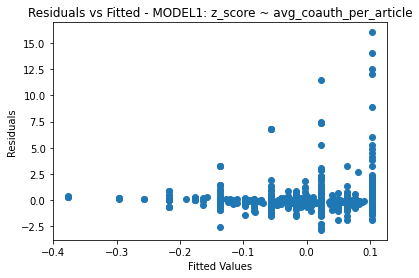

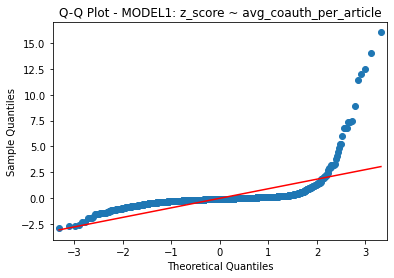


Top 5 influential points (Cook's Distance):
      dfb_const  dfb_avg_coauth_per_article   cooks_d  standard_resid  \
68     0.642720                   -0.504391  0.178335       17.402253   
2931   0.553445                   -0.434331  0.137088       15.257621   
384    0.487254                   -0.382385  0.108835       13.594754   
1225   0.466597                   -0.366174  0.100500       13.063800   
3204   0.337690                   -0.265011  0.054649        9.633356   

      hat_diag  dffits_internal  student_resid    dffits  
68    0.001176         0.597218      18.728114  0.642720  
2931  0.001176         0.523618      16.126767  0.553445  
384   0.001176         0.466551      14.198034  0.487254  
1225  0.001176         0.448329      13.596111  0.466597  
3204  0.001176         0.330602       9.839894  0.337690  


In [463]:

# MODEL1 Sub-model 1
X1 = with_zs[['avg_coauth_per_article']]
y = with_zs['z_score']
fit_and_diagnose(X1, y, "MODEL1: z_score ~ avg_coauth_per_article")



MODEL1: z_score ~ citation + num_acknowledged

                            OLS Regression Results                            
Dep. Variable:                z_score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.274
Date:                Wed, 26 Feb 2025   Prob (F-statistic):              0.280
Time:                        01:58:27   Log-Likelihood:                -2966.1
No. Observations:                2213   AIC:                             5938.
Df Residuals:                    2210   BIC:                             5955.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

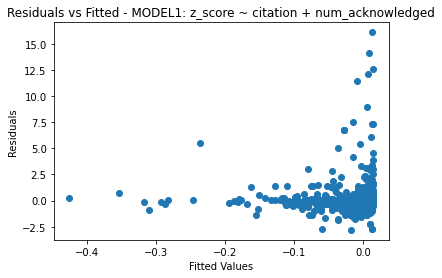

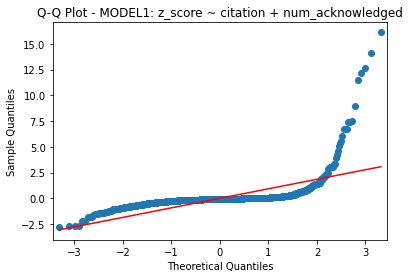


Top 5 influential points (Cook's Distance):
      dfb_const  dfb_citation  dfb_num_acknowledged   cooks_d  standard_resid  \
2316  -0.340157      1.151634             -0.386756  0.440680        6.091325   
68     0.442009     -0.201400              0.006480  0.058730       17.428479   
136    0.071845     -0.184939              0.353455  0.047662        5.829466   
2931   0.358859     -0.116887             -0.013908  0.040327       15.297004   
384    0.350389     -0.126364             -0.072334  0.037539       13.635185   

      hat_diag  dffits_internal  student_resid    dffits  
2316  0.034405         1.149799       6.141723  1.159312  
68    0.000580         0.419751      18.761503  0.451855  
136   0.004190         0.378136       5.873480  0.380991  
2931  0.000517         0.347822      16.173745  0.367757  
384   0.000605         0.335583      14.244424  0.350578  


In [464]:

# MODEL1 Sub-model 2
X2 = with_zs[['citation', 'num_acknowledged']]
fit_and_diagnose(X2, y, "MODEL1: z_score ~ citation + num_acknowledged")



MODEL1: z_score ~ citation + num_acknowledged + avg_coauth_per_article

                            OLS Regression Results                            
Dep. Variable:                z_score   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.093
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           9.65e-05
Time:                        01:58:30   Log-Likelihood:                -2956.8
No. Observations:                2213   AIC:                             5922.
Df Residuals:                    2209   BIC:                             5944.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

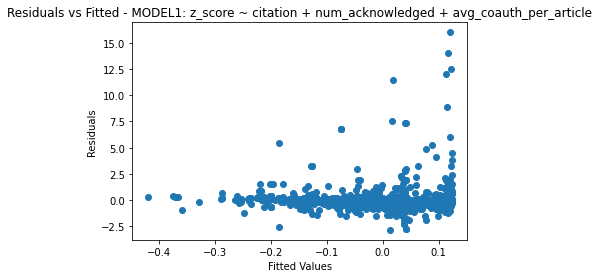

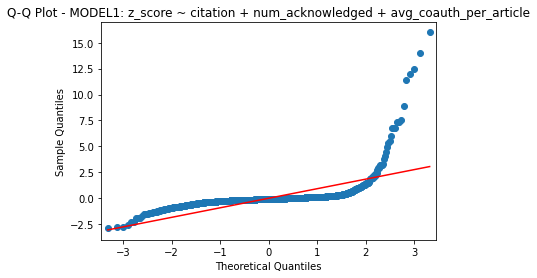


Top 5 influential points (Cook's Distance):
      dfb_const  dfb_citation  dfb_num_acknowledged  \
2316  -0.169581      1.147624             -0.389111   
68     0.668041     -0.183776             -0.025925   
2931   0.561774     -0.101690             -0.041841   
384    0.519829     -0.112665             -0.096730   
1225   0.461868     -0.116519              0.040419   

      dfb_avg_coauth_per_article   cooks_d  standard_resid  hat_diag  \
2316                   -0.080635  0.328680        6.059119  0.034573   
68                     -0.502013  0.098282       17.388425  0.001299   
2931                   -0.434252  0.072272       15.247192  0.001242   
384                    -0.385365  0.061980       13.577201  0.001343   
1225                   -0.361196  0.053326       13.055781  0.001250   

      dffits_internal  student_resid    dffits  
2316         1.146613       6.108722  1.155999  
68           0.627000      18.712212  0.674733  
2931         0.537668      16.115302  0.5682

In [465]:

# MODEL1 Sub-model 3
X3 = with_zs[['citation', 'num_acknowledged', 'avg_coauth_per_article']]
fit_and_diagnose(X3, y, "MODEL1: z_score ~ citation + num_acknowledged + avg_coauth_per_article")



MODEL2: z_score ~ citation + num_acknowledged + avg_coauth_per_article + unique_coauthors

                            OLS Regression Results                            
Dep. Variable:                z_score   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     6.239
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           5.45e-05
Time:                        01:58:42   Log-Likelihood:                -2954.9
No. Observations:                2213   AIC:                             5920.
Df Residuals:                    2208   BIC:                             5948.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

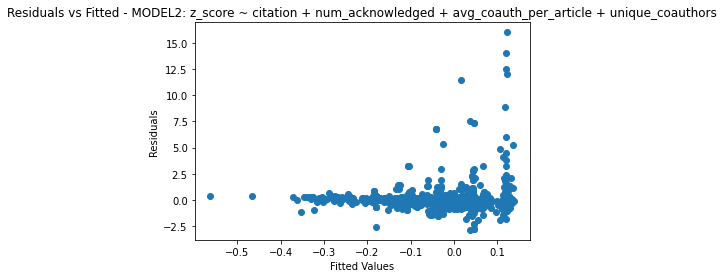

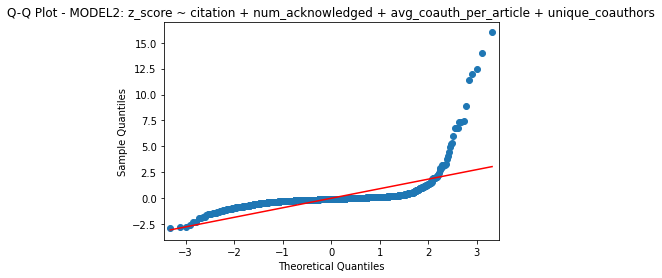


Top 5 influential points (Cook's Distance):
      dfb_const  dfb_citation  dfb_num_acknowledged  \
2316  -0.190045      1.251363             -0.117935   
68     0.666785     -0.160024             -0.014053   
2931   0.559505     -0.076241             -0.019889   
384    0.520546     -0.110566             -0.095378   
1225   0.458406     -0.080286              0.065080   

      dfb_avg_coauth_per_article  dfb_unique_coauthors   cooks_d  \
2316                    0.318293             -0.554315  0.312934   
68                     -0.353123             -0.023152  0.078791   
2931                   -0.289041             -0.044095  0.058196   
384                    -0.295076              0.017468  0.049716   
1225                   -0.218751             -0.068423  0.043515   

      standard_resid  hat_diag  dffits_internal  student_resid    dffits  
2316        5.911157  0.042860         1.250867       5.957142  1.260598  
68         17.396504  0.001300         0.627660      18.722957  0

In [467]:

# MODEL2 Sub-model 4
X4 = with_zs[['citation', 'num_acknowledged', 'avg_coauth_per_article', 'unique_coauthors']]
fit_and_diagnose(X4, y, "MODEL2: z_score ~ citation + num_acknowledged + avg_coauth_per_article + unique_coauthors")



MODEL2: z_score ~ log(citation) + log(num_acknowledged + 1)

                            OLS Regression Results                            
Dep. Variable:                z_score   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     10.20
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           3.88e-05
Time:                        01:58:59   Log-Likelihood:                -2957.2
No. Observations:                2213   AIC:                             5920.
Df Residuals:                    2210   BIC:                             5938.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

<ipython-input-469-f2a82236b9e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_zs['log_citation'] = np.log1p(with_zs['citation'])  # log(1 + citations)
<ipython-input-469-f2a82236b9e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_zs['log_ack'] = np.log1p(with_zs['num_acknowledged'])  # log(1 + num_acknowledged)


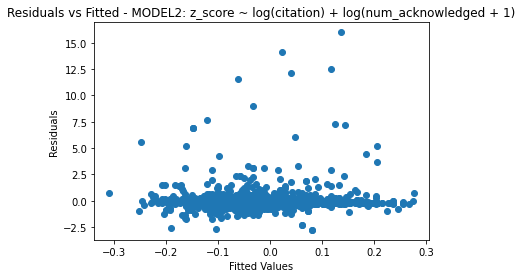

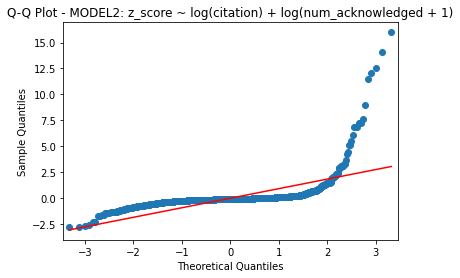


Top 5 influential points (Cook's Distance):
      dfb_const  dfb_log_citation  dfb_log_ack   cooks_d  standard_resid  \
68     0.703456         -0.644015     0.302459  0.166572       17.373720   
384    0.490300         -0.386754    -0.052513  0.086553       13.584385   
136    0.282485         -0.329111     0.405497  0.071455        5.630900   
2316  -0.307864          0.349630    -0.042093  0.048280        6.034178   
1225   0.206724         -0.173730     0.251932  0.047928       13.131767   

      hat_diag  dffits_internal  student_resid    dffits  
68    0.001653         0.706906      18.693214  0.760594  
384   0.001405         0.509567      14.186509  0.532154  
136   0.006715         0.462995       5.670450  0.466247  
2316  0.003962         0.380579       6.083133  0.383666  
1225  0.000833         0.379187      13.673074  0.394818  


In [469]:
import numpy as np
# MODEL2 Sub-model 5 (Log-transformed predictors)
with_zs['log_citation'] = np.log1p(with_zs['citation'])  # log(1 + citations)
with_zs['log_ack'] = np.log1p(with_zs['num_acknowledged'])  # log(1 + num_acknowledged)
X5 = with_zs[['log_citation', 'log_ack']]
fit_and_diagnose(X5, y, "MODEL2: z_score ~ log(citation) + log(num_acknowledged + 1)")


In [470]:

# Check VIF for multicollinearity (example for Sub-model 3)
from statsmodels.stats.outliers_influence import variance_inflation_factor
def check_vif(X):
    X = sm.add_constant(X)
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(f"\nVIF for {X.columns.tolist()}:")
    print(vif)

check_vif(X3)


VIF for ['const', 'citation', 'num_acknowledged', 'avg_coauth_per_article']:
                 Variable       VIF
0                   const  3.004782
1                citation  1.135212
2        num_acknowledged  1.138639
3  avg_coauth_per_article  1.004334
